In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import sys
import argparse
import h5py
from scipy.stats import t as student_t
from statsmodels.stats import multitest as mt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
!pip install seaborn=='0.11.0'


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
sns.__version__

'0.11.0'

In [5]:
# IDP_df = pd.read_pickle('male_IDP_prototype.pkl')
# vars_df = pd.read_pickle('male_vars_prototype.pkl')

IDP_df = pd.read_pickle('female_IDP_testB.pkl')
vars_df = pd.read_pickle('female_vars_testB.pkl')

# IDP_names = np.loadtxt("IDP_names.txt", dtype=str, delimiter='\n')
with open('IDP_names.txt') as f:
    IDP_names = f.readlines()
    IDP_names = [l.strip('\n\r') for l in IDP_names]
    IDP_names = np.array(IDP_names)
# IDP_categories = np.loadtxt("IDP_categories.txt", dtype=str, delimiter='\n')
with open('IDP_categories.txt') as f:
    IDP_categories = f.readlines()
    IDP_categories = [l.strip('\n\r') for l in IDP_categories]
    IDP_categories = np.array(IDP_categories)
    
with open('varsHeader.txt') as f:
    varsHeader = f.readlines()
    varsHeader = [l.strip('\n\r') for l in varsHeader]
    varsHeader = np.array(varsHeader)
# vars_categories = np.loadtxt("vars_categories.txt", dtype=str, delimiter='\n')
with open('vars_categories.txt') as f:
    vars_categories = f.readlines()
    vars_categories = [l.strip('\n\r') for l in vars_categories]
    vars_categories = np.array(vars_categories)

In [6]:
vars_df.head()

modality      bonf       fdr  \
0  T1_nonlinear  5.442009  3.767651   
1     T1_linear  5.442009  3.650484   
2      jacobian  5.442009  3.676520   
3           vbm  5.442009  3.632807   
4  T2_nonlinear  5.442009  4.016448   

                                           dataframe  
0           idx                                  ...  
1           idx                                  ...  
2           idx                                  ...  
3           idx                                  ...  
4           idx                                  ...

In [7]:
vars_df.iloc[9].dataframe.sort_values('log_p_values', ascending=False)

idx                                              names  \
2101    3422     Total BMD (bone mineral density) T-score (2.0)   
2100    3420             Total BMD (bone mineral density) (2.0)   
2093    3406              Head BMD (bone mineral density) (2.0)   
2092    3404              Arms BMD (bone mineral density) (2.0)   
2118    3456              Head BMC (bone mineral content) (2.0)   
...      ...                                                ...   
6987   10518  Operative procedures - main OPCS4 (T249 - T24....   
8400   11934  Diagnoses - secondary ICD10 (K743 - K74.3 Prim...   
5123    8458  Treatment/medication code (1140860904 - trando...   
6560   10091  Operative procedures - main OPCS4 (G431 - G43....   
12393  15977  Diagnoses - ICD10 (Z877 - Z87.7 Personal histo...   

                  Categories     pearson_r  t_test_statistic  \
2101   Skeletal Measurements -3.438255e-01      1.730608e+01   
2100   Skeletal Measurements -3.421063e-01      1.720804e+01   
2093   Skeletal Measurements -3.300418e-01      1.652548e+01   
2092   Skeletal Measurements -3.071889e-01      1.525705e+01   
2118   Skeletal Measurements -3.034347e-01      1.499756e+01   
...                      ...           ...               ...   
6987         Medical History -5.261511e-18      2.635487e-16   
8400         Medical History  5.537851e-18      2.773905e-16   
5123         Medical History -4.377223e-18      2.192548e-16   
6560         Medical History  4.509867e-18      2.258988e-16   
12393        Medical History  4.863582e-18      2.436164e-16   

       p_values_corrected      p_values  abs_pearson_r  log_p_values  \
2101         6.311650e-59  4.562089e-63   3.438255e-01  6.234084e+01   
2100         1.411233e-58  2.040092e-62   3.421063e-01  6.169035e+01   
2093         2.653853e-54  5.754650e-58   3.300418e-01  5.723998e+01   
2092         1.562229e-46  4.516743e-50   3.071889e-01  4.934517e+01   
2118         4.630426e-45  1.673446e-48   3.034347e-01  4.777639e+01   
...                   ...           ...            ...           ...   
6987         1.000000e+00  1.000000e+00   5.261511e-18  9.643275e-17   
8400         1.000000e+00  1.000000e+00   5.537851e-18  9.643275e-17   
5123         1.000000e+00  1.000000e+00   4.377223e-18  9.643275e-17   
6560         1.000000e+00  1.000000e+00   4.509867e-18  9.643275e-17   
12393        1.000000e+00  1.000000e+00   4.863582e-18  9.643275e-17   

       log_p_values_corrected  
2101             5.819986e+01  
2100             5.785040e+01  
2093             5.357612e+01  
2092             4.580626e+01  
2118             4.433438e+01  
...                       ...  
6987             9.643275e-17  
8400             9.643275e-17  
5123             9.643275e-17  
6560             9.643275e-17  
12393            9.643275e-17  

[13835 rows x 10 columns]

In [8]:
vars_df.iloc[0].dataframe.head()

idx                             names         Categories  pearson_r  \
0    0           Ethnic background (0.0)  Ethnic Background   0.000919   
1    1           Ethnic background (1.0)  Ethnic Background  -0.006902   
2    2           Ethnic background (2.0)  Ethnic Background  -0.006575   
3    3  Genotype measurement batch (0.0)    Genetic Markers  -0.072094   
4    4              Heterozygosity (0.0)    Genetic Markers  -0.023098   

   t_test_statistic  p_values_corrected  p_values  abs_pearson_r  \
0          0.045977            1.000000  0.963332       0.000919   
1          0.142788            1.000000  0.886524       0.006902   
2          0.176541            1.000000  0.859918       0.006575   
3          3.577774            0.077575  0.000353       0.072094   
4          1.143596            1.000000  0.252903       0.023098   

   log_p_values  log_p_values_corrected  
0      0.016224               -0.000000  
1      0.052309               -0.000000  
2      0.065543               -0.000000  
3      3.451915                1.110277  
4      0.597046               -0.000000

In [9]:
vars_over_bThr_list = []

for idx in range(len(vars_df)):
    df = vars_df.iloc[idx].dataframe
    bThr = vars_df.iloc[idx].bonf
    vars_over_bThr = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_bThr:
        vars_over_bThr_list.append(var)

In [10]:
print("Number of unique vars across all modalities: ", len(set(vars_over_bThr_list)))

Number of unique vars across all modalities:  149


In [11]:
unique_vars_over_bTHr = list(set(vars_over_bThr_list))

In [12]:
unique_vars_over_bThr_categories = []

for var in unique_vars_over_bTHr:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars_over_bThr_categories.append(category)

In [13]:
sorted(unique_vars_over_bTHr)

['Alcohol intake frequency. (0.0)',
 'Alcohol intake frequency. (2.0)',
 'Amount of alcohol drunk on a typical drinking day (0.0)',
 'Android tissue fat percentage (2.0)',
 'Android total mass (2.0)',
 'Arm BMD (bone mineral density) (left) (2.0)',
 'Arm BMD (bone mineral density) (right) (2.0)',
 'Arm fat mass (right) (0.0)',
 'Arm fat mass (right) (2.0)',
 'Arm fat percentage (left) (2.0)',
 'Arm fat percentage (right) (2.0)',
 'Arm total mass (right) (2.0)',
 'Arms BMC (bone mineral content) (2.0)',
 'Arms BMD (bone mineral density) (2.0)',
 'Arms tissue fat percentage (2.0)',
 'Arms total mass (2.0)',
 'Body fat percentage (0.0)',
 'Body fat percentage (2.0)',
 'Body mass index (BMI) (2.0)',
 'Body surface area (2.0)',
 'C-reactive protein (0.0)',
 'Cardiac index during PWA (2.0)',
 'Diabetes diagnosed by doctor (0.0)',
 'Diagnoses - ICD10 (E109 - E10.9 Without complications)',
 'Diagnoses - ICD10 (E230 - E23.0 Hypopituitarism)',
 'Diagnoses - ICD10 (E274 - E27.4 Other and unspecif

In [14]:
modalities = []
pearson_rs_list = []
for var in unique_vars_over_bTHr:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df)):
        df = vars_df.iloc[idx].dataframe
        modality = vars_df.iloc[idx].modality
        bThr = vars_df.iloc[idx].bonf
        df = df[df.log_p_values>=bThr].sort_values('log_p_values', ascending=False)
        vars_over_bThr = df.names.to_list()
        pearson_r_over_bThr = df.pearson_r.to_list()
        if var in vars_over_bThr:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_bThr[vars_over_bThr.index(var)])
    modalities.append(modalities_with_var)
    pearson_rs_list.append(pearsonRs_with_var)

In [15]:
len(modalities)

149

In [16]:
df_vars_over_bThr = pd.DataFrame.from_dict({
    'names': unique_vars_over_bTHr,
    'Categories': unique_vars_over_bThr_categories,
    'modalities': modalities,
    'pearson_r': pearson_rs_list
})

In [17]:
df_vars_over_bThr.head()

names             Categories  \
0  Heel broadband ultrasound attenuation (right) ...  Skeletal Measurements   
1  Heel broadband ultrasound attenuation (right) ...  Skeletal Measurements   
2  Diagnoses - secondary ICD10 (Z634 - Z63.4 Disa...        Medical History   
3             Total BMD (bone mineral density) (2.0)  Skeletal Measurements   
4  Heel quantitative ultrasound index (QUI), dire...  Skeletal Measurements   

                                          modalities  \
0                   [rsfmri_0, rsfmri_19, rsfmri_22]   
1  [T1_linear, jacobian, swi, rsfmri_0, rsfmri_1,...   
2                                        [tfmri_c_1]   
3  [T1_nonlinear, T1_linear, jacobian, vbm, swi, ...   
4                                [jacobian, tbss_L1]   

                                           pearson_r  
0  [-0.25535610532282543, -0.24778370725147306, -...  
1  [-0.11685781527705914, -0.16396672649833086, -...  
2                               [0.1004446213036294]  
3  [-0.1281580040636976, -0.17358634614583784, -0...  
4        [-0.1619157001169532, -0.16552167511694738]

In [18]:
vars_over_FDR_list = []

for idx in range(len(vars_df)):
    df = vars_df.iloc[idx].dataframe
    FDR = vars_df.iloc[idx].fdr
    vars_over_FDR = df[df.log_p_values>=FDR].sort_values('log_p_values', ascending=False).names.to_list()
    for var in vars_over_FDR:
        vars_over_FDR_list.append(var)
        
print("Number of unique vars across all modalities: ", len(set(vars_over_FDR_list)))

unique_vars_over_FDR = list(set(vars_over_FDR_list))

unique_vars_over_FDR_categories = []

for var in unique_vars_over_FDR:
    idx = list(varsHeader).index(var)
    category = vars_categories[idx]
    unique_vars_over_FDR_categories.append(category)
    
modalities = []
pearson_rs_list = []
for var in unique_vars_over_FDR:
    modalities_with_var = []
    pearsonRs_with_var = []
    for idx in range(len(vars_df)):
        df = vars_df.iloc[idx].dataframe
        modality = vars_df.iloc[idx].modality
        FDR = vars_df.iloc[idx].bonf
        df = df[df.log_p_values>=FDR].sort_values('log_p_values', ascending=False)
        vars_over_FDR = df.names.to_list()
        pearson_r_over_FDR = df.pearson_r.to_list()
        if var in vars_over_FDR:
            modalities_with_var.append(modality)
            pearsonRs_with_var.append(pearson_r_over_FDR[vars_over_FDR.index(var)])
    modalities.append(modalities_with_var)
    pearson_rs_list.append(pearsonRs_with_var)
    
print(len(modalities))

df_vars_over_FDR = pd.DataFrame.from_dict({
    'names': unique_vars_over_FDR,
    'Categories': unique_vars_over_FDR_categories,
    'modalities': modalities,
    'pearson_r': pearson_rs_list
})

Number of unique vars across all modalities:  504
504


In [19]:
set(df_vars_over_bThr.Categories.to_list())

{'Alcohol',
 'Blood Assays',
 'Cardiac & Circulartory Measurements',
 'Medical History',
 'Physical Measurements',
 'Skeletal Measurements'}

In [20]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        for i, mod in enumerate(mods[0]):
            print('   -> {} ({:.3f})'.format(mod, prs[0][i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> tbss_L3_s (0.093)
   -> tbss_FA (0.100)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> tbss_FA (0.094)
   -> tbss_OD (0.094)
Var: Amount of alcohol drunk on a typical drinking day (0.0)
   Modalities:
   -> tbss_L2 (0.131)
   -> tbss_MD (0.120)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> tbss_L2 (0.133)
   -> tbss_L3 (0.118)
   -> tbss_MD (0.139)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> rsfmri_0 (0.129)
   -> rsfmri_7 (0.114)
   -> rsfmri_10 (0.111)
   -> tbss_FA_s (0.118)
   -> tbss_ISOVF_s (0.127)
   -> tbss_L2_s (0.115)
   -> tbss_L3_s (0.121)
   -> tbss_FA (0.124)
   -> tbss_ISOVF (0.117)
   -> tbss_L1 (0.121)
   -> tbss_L2 (0.127)
   -> tbss_L3 (0.119)
   -> tbss_MD (0.129)
   -> tbss_MO (0.127)
   -> tbss_OD (0.116)


Category: Blood Assays
----------------------------------------------

In [21]:
sorted(prs[0], reverse=True)

[-0.1086421133292486]

In [22]:
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        print('Var: {}'.format(name))
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        print('   Modalities:')
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        for i, mod in enumerate(mods):
            print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
   Modalities:
   -> tbss_FA (0.100)
   -> tbss_L3_s (0.093)
Var: Alcohol intake frequency. (2.0)
   Modalities:
   -> tbss_OD (0.094)
   -> tbss_FA (0.094)
Var: Amount of alcohol drunk on a typical drinking day (0.0)
   Modalities:
   -> tbss_L2 (0.131)
   -> tbss_MD (0.120)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> tbss_MD (0.139)
   -> tbss_L2 (0.133)
   -> tbss_L3 (0.118)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> tbss_MD (0.129)
   -> rsfmri_0 (0.129)
   -> tbss_MO (0.127)
   -> tbss_ISOVF_s (0.127)
   -> tbss_L2 (0.127)
   -> tbss_FA (0.124)
   -> tbss_L3_s (0.121)
   -> tbss_L1 (0.121)
   -> tbss_L3 (0.119)
   -> tbss_FA_s (0.118)
   -> tbss_ISOVF (0.117)
   -> tbss_OD (0.116)
   -> tbss_L2_s (0.115)
   -> rsfmri_7 (0.114)
   -> rsfmri_10 (0.111)


Category: Blood Assays
----------------------------------------------

   Modalities:
   -> rsfmri_19 (-0.232)
Var: Heel broadband ultrasound attenuation (left) (2.0)
   Modalities:
   -> rsfmri_7 (-0.198)
   -> rsfmri_0 (-0.193)
   -> rsfmri_24 (-0.189)
   -> rsfmri_3 (-0.179)
   -> rsfmri_8 (-0.179)
   -> rsfmri_21 (-0.176)
   -> rsfmri_17 (-0.171)
   -> rsfmri_13 (-0.170)
   -> rsfmri_22 (-0.169)
   -> rsfmri_11 (-0.168)
   -> rsfmri_5 (-0.163)
   -> rsfmri_14 (-0.163)
   -> jacobian (-0.161)
   -> tfmri_5 (-0.160)
   -> rsfmri_16 (-0.159)
   -> rsfmri_20 (-0.159)
   -> rsfmri_2 (-0.159)
   -> rsfmri_19 (-0.158)
   -> rsfmri_15 (-0.157)
   -> rsfmri_1 (-0.154)
   -> rsfmri_23 (-0.152)
   -> rsfmri_4 (-0.151)
   -> tbss_MO (-0.151)
   -> rsfmri_12 (-0.148)
   -> tfmri_1 (-0.146)
   -> rsfmri_18 (-0.144)
   -> tbss_ISOVF_s (-0.143)
   -> tfmri_c_5 (-0.143)
   -> tbss_L1_s (-0.141)
   -> rsfmri_6 (-0.138)
   -> tfmri_c_1 (-0.136)
   -> rsfmri_9 (-0.135)
   -> rsfmri_10 (-0.134)
   -> tbss_L3_s (-0.133)
   -> tbss_L1 (-0.130)
   -> tbss_ISOVF (-0.130)
   -

In [23]:
variance_threshold = 0.115

for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        if abs(prs[0]) >= variance_threshold:
            print('Var: {}'.format(name))
            print('   Modalities:')
            for i, mod in enumerate(mods):
                if abs(prs[i]) >= variance_threshold:
                    print('   -> {} ({:.3f})'.format(mod, prs[i]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Amount of alcohol drunk on a typical drinking day (0.0)
   Modalities:
   -> tbss_L2 (0.131)
   -> tbss_MD (0.120)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> tbss_MD (0.139)
   -> tbss_L2 (0.133)
   -> tbss_L3 (0.118)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> tbss_MD (0.129)
   -> rsfmri_0 (0.129)
   -> tbss_MO (0.127)
   -> tbss_ISOVF_s (0.127)
   -> tbss_L2 (0.127)
   -> tbss_FA (0.124)
   -> tbss_L3_s (0.121)
   -> tbss_L1 (0.121)
   -> tbss_L3 (0.119)
   -> tbss_FA_s (0.118)
   -> tbss_ISOVF (0.117)
   -> tbss_OD (0.116)
   -> tbss_L2_s (0.115)


Category: Blood Assays
------------------------------------------------


Category: Cardiac & Circulartory Measurements
------------------------------------------------


Category: Medical History
------------------------------------------------
Var: Diagnoses - ICD10 (I10 - I10 Essential (primary) hypertensi

In [24]:
variance_threshold = 0.1

for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()
        prs = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].pearson_r.to_list()
        
        
        prs_abs = np.abs(prs).tolist()
        _, mods = zip(*sorted(zip(prs_abs[0], mods[0]), reverse=True))
        _, prs = zip(*sorted(zip(prs_abs[0], prs[0]), reverse=True))
        
        if abs(prs[0]) >= variance_threshold:
            print('Var: {}'.format(name))
            print('   Modalities:')
#             for i, mod in enumerate(mods):
#                 if abs(prs[0]) >= variance_threshold:
            print('   -> {} ({:.3f})'.format(mods[0], prs[0]))
        
    print('\n')

Category: Alcohol
------------------------------------------------
Var: Amount of alcohol drunk on a typical drinking day (0.0)
   Modalities:
   -> tbss_L2 (0.131)
Var: Frequency of consuming six or more units of alcohol (0.0)
   Modalities:
   -> tbss_MD (0.139)
Var: Frequency of drinking alcohol (0.0)
   Modalities:
   -> tbss_MD (0.129)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)
   Modalities:
   -> rsfmri_2 (-0.108)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Cardiac index during PWA (2.0)
   Modalities:
   -> tbss_ISOVF_s (0.103)
Var: Systolic blood pressure, automated reading (0.0)
   Modalities:
   -> tbss_FA_s (0.113)
Var: Systolic blood pressure, automated reading (0.1)
   Modalities:
   -> tbss_FA_s (0.113)


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
   Modalities:
   -> tbss_ICVF (0.10

In [25]:
mods

('rsfmri_3',)

In [26]:
counter = 0
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()[0]
        print('Var: {}'.format(name))
        counter += 1
    print('\n')
    
print("There are {} vars in total".format(counter))

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
Var: Alcohol intake frequency. (2.0)
Var: Amount of alcohol drunk on a typical drinking day (0.0)
Var: Frequency of consuming six or more units of alcohol (0.0)
Var: Frequency of drinking alcohol (0.0)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Cardiac index during PWA (2.0)
Var: Systolic blood pressure, automated reading (0.0)
Var: Systolic blood pressure, automated reading (0.1)


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
Var: Diagnoses - ICD10 (E109 - E10.9 Without complications)
Var: Diagnoses - ICD10 (E230 - E23.0 Hypopituitarism)
Var: Diagnoses - ICD10 (E274 - E27.4 Other and unspecified adrenocortical insufficiency)
Var: Diagnoses - ICD10 (F009 

In [27]:
counter = 0
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()[0]
        if 'T1_linear' in mods or 'T1_nonlinear' in mods or 'T2_nonlinear' in mods:
            print('Var: {}'.format(name))
            counter += 1
        else:
            pass
    print('\n')
    
print("There are {} vars from the conventional modalities".format(counter))

Category: Alcohol
------------------------------------------------


Category: Blood Assays
------------------------------------------------


Category: Cardiac & Circulartory Measurements
------------------------------------------------


Category: Medical History
------------------------------------------------
Var: Diagnoses - ICD10 (N202 - N20.2 Calculus of kidney with calculus of ureter)
Var: Non-cancer illness code, self-reported (1134 - oesophageal disorder)
Var: Non-cancer illness code, self-reported (1220 - diabetes)
Var: Non-cancer illness code, self-reported (1261 - multiple sclerosis)


Category: Physical Measurements
------------------------------------------------


Category: Skeletal Measurements
------------------------------------------------
Var: Arm BMD (bone mineral density) (left) (2.0)
Var: Arm BMD (bone mineral density) (right) (2.0)
Var: Arms BMC (bone mineral content) (2.0)
Var: Arms BMD (bone mineral density) (2.0)
Var: Femur neck BMD (bone mineral density) (l

In [28]:
counter = 0
for cat in sorted(list(set(df_vars_over_bThr.Categories.to_list()))):
    print("Category: {}".format(cat))
    print('------------------------------------------------')
    names = df_vars_over_bThr[df_vars_over_bThr.Categories == cat].names.to_list()
    for name in sorted(names):
        mods = df_vars_over_bThr[(df_vars_over_bThr.Categories == cat) & (df_vars_over_bThr.names == name)].modalities.to_list()[0]
        if 'T1_linear' in mods or 'T1_nonlinear' in mods or 'T2_nonlinear' in mods:
            pass
        else:
            print('Var: {}'.format(name))
            counter += 1
    print('\n')
    
print("There are {} vars indepdent from the conventional modalities".format(counter))

Category: Alcohol
------------------------------------------------
Var: Alcohol intake frequency. (0.0)
Var: Alcohol intake frequency. (2.0)
Var: Amount of alcohol drunk on a typical drinking day (0.0)
Var: Frequency of consuming six or more units of alcohol (0.0)
Var: Frequency of drinking alcohol (0.0)


Category: Blood Assays
------------------------------------------------
Var: C-reactive protein (0.0)


Category: Cardiac & Circulartory Measurements
------------------------------------------------
Var: Cardiac index during PWA (2.0)
Var: Systolic blood pressure, automated reading (0.0)
Var: Systolic blood pressure, automated reading (0.1)


Category: Medical History
------------------------------------------------
Var: Diabetes diagnosed by doctor (0.0)
Var: Diagnoses - ICD10 (E109 - E10.9 Without complications)
Var: Diagnoses - ICD10 (E230 - E23.0 Hypopituitarism)
Var: Diagnoses - ICD10 (E274 - E27.4 Other and unspecified adrenocortical insufficiency)
Var: Diagnoses - ICD10 (F009 

In [29]:
len(vars_categories)

17527

In [30]:
len(set(vars_categories))

19

In [31]:
unique_vars_categories = list(set(vars_categories))

In [32]:
unique_vars_counters = []
for unique_category in unique_vars_categories:
    counter = 0
    for category in vars_categories:
        if unique_category == category:
            counter += 1
    unique_vars_counters.append(counter)

In [33]:
unique_vars_counters

[815,
 3,
 333,
 868,
 1689,
 755,
 138,
 260,
 297,
 63,
 434,
 9780,
 1167,
 107,
 122,
 16,
 468,
 32,
 180]

In [34]:
df_vars_over_bThr.head()

names             Categories  \
0  Heel broadband ultrasound attenuation (right) ...  Skeletal Measurements   
1  Heel broadband ultrasound attenuation (right) ...  Skeletal Measurements   
2  Diagnoses - secondary ICD10 (Z634 - Z63.4 Disa...        Medical History   
3             Total BMD (bone mineral density) (2.0)  Skeletal Measurements   
4  Heel quantitative ultrasound index (QUI), dire...  Skeletal Measurements   

                                          modalities  \
0                   [rsfmri_0, rsfmri_19, rsfmri_22]   
1  [T1_linear, jacobian, swi, rsfmri_0, rsfmri_1,...   
2                                        [tfmri_c_1]   
3  [T1_nonlinear, T1_linear, jacobian, vbm, swi, ...   
4                                [jacobian, tbss_L1]   

                                           pearson_r  
0  [-0.25535610532282543, -0.24778370725147306, -...  
1  [-0.11685781527705914, -0.16396672649833086, -...  
2                               [0.1004446213036294]  
3  [-0.1281580040636976, -0.17358634614583784, -0...  
4        [-0.1619157001169532, -0.16552167511694738]

In [35]:
vars_df.head()

modality      bonf       fdr  \
0  T1_nonlinear  5.442009  3.767651   
1     T1_linear  5.442009  3.650484   
2      jacobian  5.442009  3.676520   
3           vbm  5.442009  3.632807   
4  T2_nonlinear  5.442009  4.016448   

                                           dataframe  
0           idx                                  ...  
1           idx                                  ...  
2           idx                                  ...  
3           idx                                  ...  
4           idx                                  ...

In [36]:
vars_df.iloc[0].dataframe

idx                                              names  \
0          0                            Ethnic background (0.0)   
1          1                            Ethnic background (1.0)   
2          2                            Ethnic background (2.0)   
3          3                   Genotype measurement batch (0.0)   
4          4                               Heterozygosity (0.0)   
...      ...                                                ...   
13830  17507      Manifestations of mania or irritability (0.1)   
13831  17514                 Substances taken for anxiety (0.1)   
13832  17516       Activities undertaken to treat anxiety (0.1)   
13833  17525  Ever been offered/sought treatment for anxiety...   
13834  17526  Ever been offered/sought treatment for depress...   

              Categories  pearson_r  t_test_statistic  p_values_corrected  \
0      Ethnic Background   0.000919          0.045977            1.000000   
1      Ethnic Background  -0.006902          0.142788            1.000000   
2      Ethnic Background  -0.006575          0.176541            1.000000   
3        Genetic Markers  -0.072094          3.577774            0.077575   
4        Genetic Markers  -0.023098          1.143596            1.000000   
...                  ...        ...               ...                 ...   
13830      Mental Health   0.004880          0.087302            1.000000   
13831      Mental Health  -0.006877          0.124362            1.000000   
13832      Mental Health  -0.131146          2.381196            0.649294   
13833      Mental Health  -0.000225          0.010113            1.000000   
13834      Mental Health  -0.004584          0.205727            1.000000   

       p_values  abs_pearson_r  log_p_values  log_p_values_corrected  
0      0.963332       0.000919      0.016224               -0.000000  
1      0.886524       0.006902      0.052309               -0.000000  
2      0.859918       0.006575      0.065543               -0.000000  
3      0.000353       0.072094      3.451915                1.110277  
4      0.252903       0.023098      0.597046               -0.000000  
...         ...            ...           ...                     ...  
13830  0.930486       0.004880      0.031290               -0.000000  
13831  0.901105       0.006877      0.045224               -0.000000  
13832  0.017834       0.131146      1.748754                0.187559  
13833  0.991932       0.000225      0.003518               -0.000000  
13834  0.837025       0.004584      0.077262               -0.000000  

[13835 rows x 10 columns]

In [37]:
categories_of_interest = list(set(df_vars_over_bThr.Categories.to_list()))
categories_of_interest.sort()

In [38]:
categories_of_interest

['Alcohol',
 'Blood Assays',
 'Cardiac & Circulartory Measurements',
 'Medical History',
 'Physical Measurements',
 'Skeletal Measurements']

In [39]:
df_of_interest = vars_df.iloc[0].dataframe
bThr = vars_df.iloc[0].bonf
print(bThr)
len(df_of_interest[(df_of_interest.Categories=='Alcohol') & (df_of_interest.log_p_values>=bThr)])

5.442009159140952


0

In [40]:
modalities = []
counters = []


for idx in range(len(vars_df.modality)):
    
    modality = vars_df.iloc[idx].modality

    df_of_interest = vars_df.iloc[idx].dataframe
    bThr = vars_df.iloc[idx].bonf

    counter = []

    for category in categories_of_interest:
        counter.append(len(df_of_interest[(df_of_interest.Categories==category) & (df_of_interest.log_p_values>=bThr)]))
    
    modalities.append(modality)
    counters.append(counter)


In [41]:
print(np.array(counters)[:,0])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 2 0 0 0 3 0 1 1 3 2 3 1 2]


In [42]:
# unique_vars_categories
# unique_vars_counters
# categories_of_interest
counters_of_interest = []
for cat in categories_of_interest:
    idx = unique_vars_categories.index(cat)
    counters_of_interest.append(unique_vars_counters[idx])
    
print(counters_of_interest)

for idx, cat in enumerate(unique_vars_categories):
    print(cat, unique_vars_counters[idx])

[138, 468, 815, 9780, 260, 180]
Cardiac & Circulartory Measurements 815
Ethnic Background 3
Physical Test 333
Lifestyle 868
Diet 1689
Hearing Test 755
Alcohol 138
Physical Measurements 260
Mental Health 297
Genetic Markers 63
Eye Test 434
Medical History 9780
Cognitive Tests 1167
Physical Activity 107
Tobacco 122
Data Collection Duration 16
Blood Assays 468
Early Life Factors 32
Skeletal Measurements 180


In [43]:
unique_vars_categories2, unique_vars_counters2 = zip(*sorted(zip(unique_vars_categories, unique_vars_counters)))

In [44]:
for idx, cat in enumerate(unique_vars_categories2):
    print(cat, '(' +  str(unique_vars_counters2[idx]) + ')')

Alcohol (138)
Blood Assays (468)
Cardiac & Circulartory Measurements (815)
Cognitive Tests (1167)
Data Collection Duration (16)
Diet (1689)
Early Life Factors (32)
Ethnic Background (3)
Eye Test (434)
Genetic Markers (63)
Hearing Test (755)
Lifestyle (868)
Medical History (9780)
Mental Health (297)
Physical Activity (107)
Physical Measurements (260)
Physical Test (333)
Skeletal Measurements (180)
Tobacco (122)


In [45]:
# counters = np.array(counters)
# dct = {}
# dct['modality'] = modalities
# for idx, cat in enumerate(categories_of_interest):
#     dct[cat] = counters[:, idx]
    
# df_dct = pd.DataFrame.from_dict(dct)
# df_dct

In [46]:
counters = np.array(counters)
dct = {}
dct['modality'] = modalities
for idx, cat in enumerate(categories_of_interest):
    dct[cat] = counters[:, idx] / counters_of_interest[idx]
    
df_dct = pd.DataFrame.from_dict(dct)
df_dct.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dct

modality   Alcohol  Blood Assays  Cardiac & Circulartory Measurements  \
0   T1_nonlinear  0.000000      0.000000                             0.000000   
1      T1_linear  0.000000      0.000000                             0.000000   
2       jacobian  0.000000      0.000000                             0.000000   
3            vbm  0.000000      0.000000                             0.000000   
4   T2_nonlinear  0.000000      0.000000                             0.000000   
5     T2_lesions  0.000000      0.000000                             0.002454   
6            swi  0.000000      0.000000                             0.000000   
7       rsfmri_0  0.007246      0.000000                             0.000000   
8       rsfmri_1  0.000000      0.000000                             0.000000   
9       rsfmri_2  0.000000      0.002137                             0.000000   
10      rsfmri_3  0.000000      0.000000                             0.000000   
11      rsfmri_4  0.000000      0.000000                             0.000000   
12      rsfmri_5  0.000000      0.002137                             0.000000   
13      rsfmri_6  0.000000      0.000000                             0.000000   
14      rsfmri_7  0.007246      0.000000                             0.000000   
15      rsfmri_8  0.000000      0.000000                             0.000000   
16      rsfmri_9  0.000000      0.000000                             0.000000   
17     rsfmri_10  0.007246      0.002137                             0.000000   
18     rsfmri_11  0.000000      0.000000                             0.000000   
19     rsfmri_12  0.000000      0.000000                             0.000000   
20     rsfmri_13  0.000000      0.000000                             0.000000   
21     rsfmri_14  0.000000      0.000000                             0.000000   
22     rsfmri_15  0.000000      0.000000                             0.000000   
23     rsfmri_16  0.000000      0.002137                             0.000000   
24     rsfmri_17  0.000000      0.000000                             0.000000   
25     rsfmri_18  0.000000      0.000000                             0.000000   
26     rsfmri_19  0.000000      0.000000                             0.000000   
27     rsfmri_20  0.000000      0.000000                             0.000000   
28     rsfmri_21  0.000000      0.002137                             0.000000   
29     rsfmri_22  0.000000      0.000000                             0.000000   
30     rsfmri_23  0.000000      0.000000                             0.000000   
31     rsfmri_24  0.000000      0.000000                             0.000000   
32       tfmri_1  0.000000      0.000000                             0.000000   
33       tfmri_2  0.000000      0.000000                             0.000000   
34       tfmri_5  0.000000      0.000000                             0.000000   
35     tfmri_c_1  0.000000      0.000000                             0.000000   
36     tfmri_c_2  0.000000      0.000000                             0.000000   
37     tfmri_c_5  0.000000      0.000000                             0.000000   
38        tracts  0.000000      0.000000                             0.000000   
39     tbss_FA_s  0.007246      0.000000                             0.002454   
40   tbss_ICVF_s  0.000000      0.000000                             0.000000   
41  tbss_ISOVF_s  0.007246      0.000000                             0.001227   
42     tbss_L1_s  0.000000      0.000000                             0.000000   
43     tbss_L2_s  0.007246      0.000000                             0.000000   
44     tbss_L3_s  0.014493      0.000000                             0.002454   
45     tbss_MD_s  0.000000      0.000000                             0.000000   
46     tbss_MO_s  0.000000      0.000000                             0.000000   
47     tbss_OD_s  0.000000      0.000000                             0.000000   
48       tbss_FA  0.021739      0.00000

In [47]:
# counters = np.array(counters)
# dct = {}
# dct['modality'] = modalities
# for idx, cat in enumerate(categories_of_interest):
#     dct[cat] = -np.log10(counters[:, idx] / counters_of_interest[idx])
    
# df_dct = pd.DataFrame.from_dict(dct)
# df_dct.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_dct

In [48]:
df_dct = pd.melt(df_dct, id_vars="modality", var_name="var_name", value_name="var_hits")

In [49]:
df_dct

modality               var_name  var_hits
0    T1_nonlinear                Alcohol  0.000000
1       T1_linear                Alcohol  0.000000
2        jacobian                Alcohol  0.000000
3             vbm                Alcohol  0.000000
4    T2_nonlinear                Alcohol  0.000000
..            ...                    ...       ...
337       tbss_L2  Skeletal Measurements  0.161111
338       tbss_L3  Skeletal Measurements  0.250000
339       tbss_MD  Skeletal Measurements  0.255556
340       tbss_MO  Skeletal Measurements  0.250000
341       tbss_OD  Skeletal Measurements  0.222222

[342 rows x 3 columns]

In [50]:
df_dct[(df_dct.modality == 'T1_nonlinear') | (df_dct.modality == 'T2_nonlinear')]

modality                             var_name  var_hits
0    T1_nonlinear                              Alcohol  0.000000
4    T2_nonlinear                              Alcohol  0.000000
57   T1_nonlinear                         Blood Assays  0.000000
61   T2_nonlinear                         Blood Assays  0.000000
114  T1_nonlinear  Cardiac & Circulartory Measurements  0.000000
118  T2_nonlinear  Cardiac & Circulartory Measurements  0.000000
171  T1_nonlinear                      Medical History  0.000204
175  T2_nonlinear                      Medical History  0.000102
228  T1_nonlinear                Physical Measurements  0.000000
232  T2_nonlinear                Physical Measurements  0.000000
285  T1_nonlinear                Skeletal Measurements  0.138889
289  T2_nonlinear                Skeletal Measurements  0.005556

In [51]:
vars_df.modality

0     T1_nonlinear
1        T1_linear
2         jacobian
3              vbm
4     T2_nonlinear
5       T2_lesions
6              swi
7         rsfmri_0
8         rsfmri_1
9         rsfmri_2
10        rsfmri_3
11        rsfmri_4
12        rsfmri_5
13        rsfmri_6
14        rsfmri_7
15        rsfmri_8
16        rsfmri_9
17       rsfmri_10
18       rsfmri_11
19       rsfmri_12
20       rsfmri_13
21       rsfmri_14
22       rsfmri_15
23       rsfmri_16
24       rsfmri_17
25       rsfmri_18
26       rsfmri_19
27       rsfmri_20
28       rsfmri_21
29       rsfmri_22
30       rsfmri_23
31       rsfmri_24
32         tfmri_1
33         tfmri_2
34         tfmri_5
35       tfmri_c_1
36       tfmri_c_2
37       tfmri_c_5
38          tracts
39       tbss_FA_s
40     tbss_ICVF_s
41    tbss_ISOVF_s
42       tbss_L1_s
43       tbss_L2_s
44       tbss_L3_s
45       tbss_MD_s
46       tbss_MO_s
47       tbss_OD_s
48         tbss_FA
49       tbss_ICVF
50      tbss_ISOVF
51         tbss_L1
52         t

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Blood Assays'),
  Text(2, 0, 'Cardiac & Circulartory Measurements'),
  Text(3, 0, 'Medical History'),
  Text(4, 0, 'Physical Measurements'),
  Text(5, 0, 'Skeletal Measurements')])

<Figure size 1600x960 with 0 Axes>

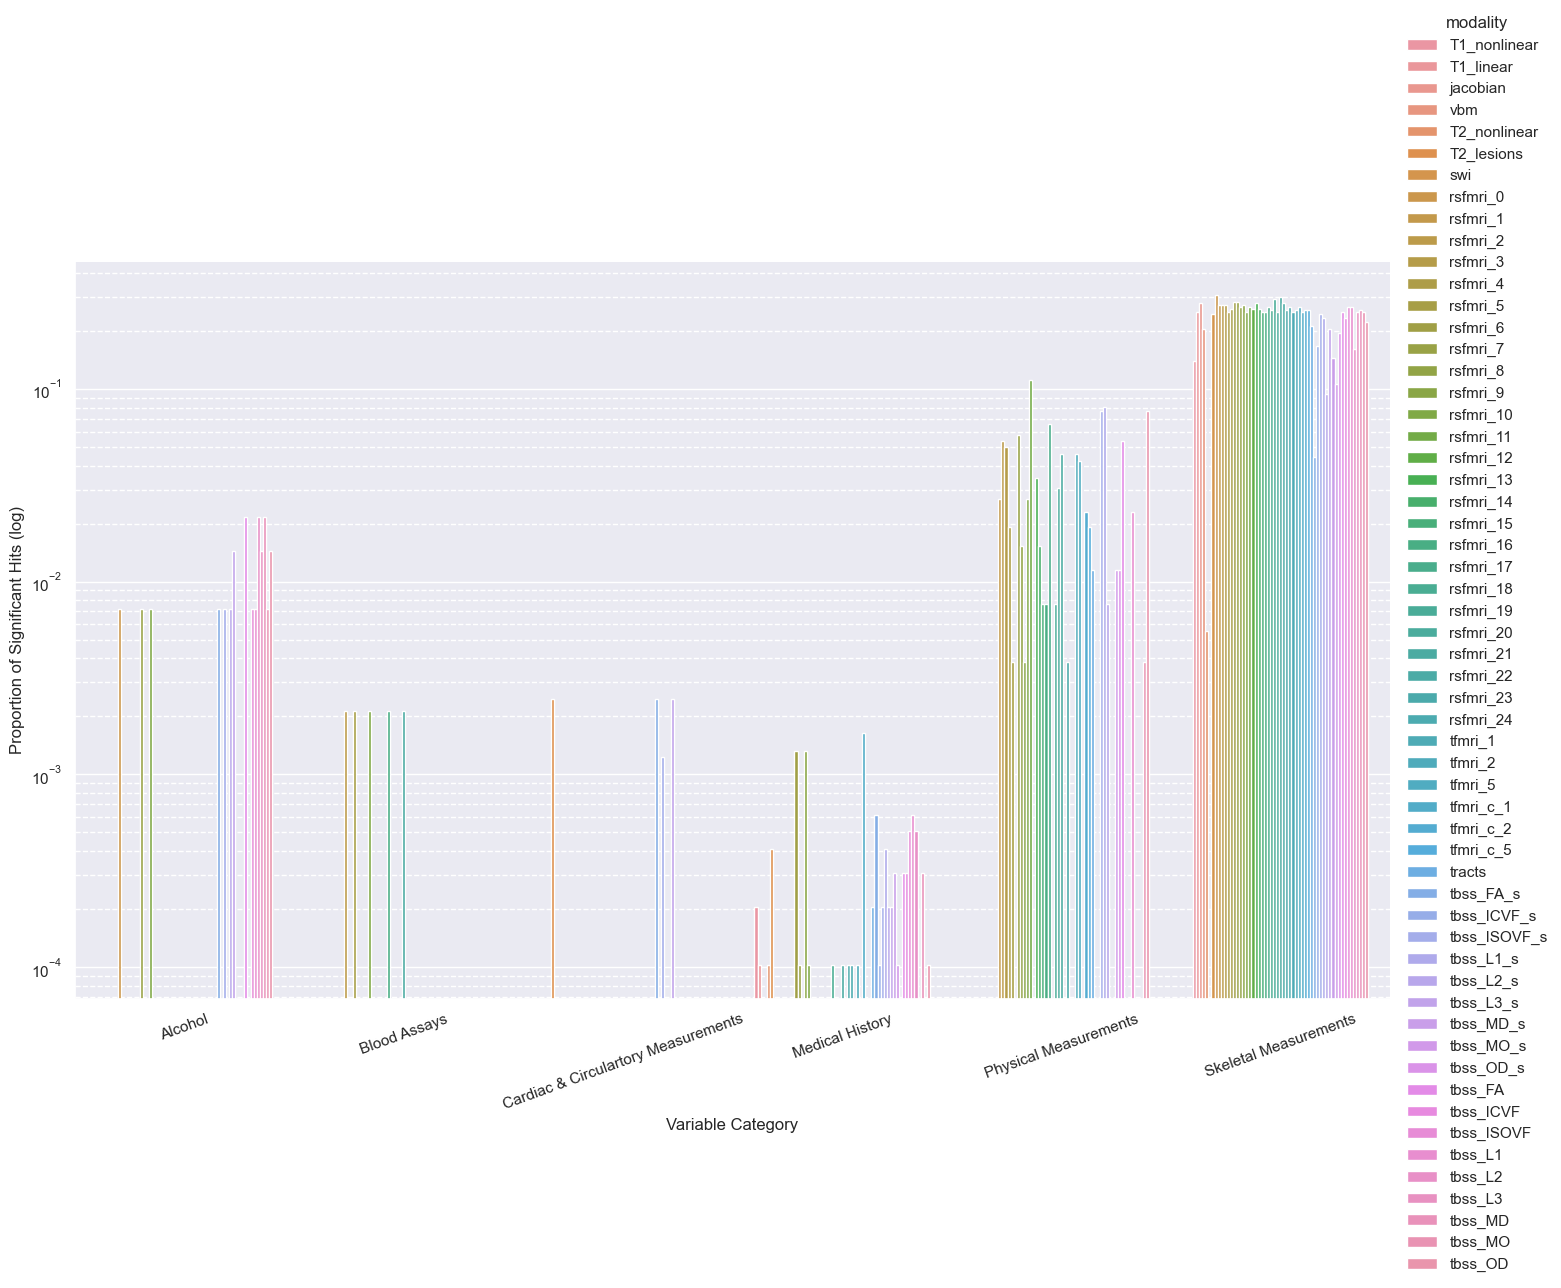

In [52]:
plt.figure(figsize=(16, 9.6))
sns.factorplot(x='var_name', y='var_hits', hue='modality', data=df_dct, kind='bar', height=8, aspect=1.75, log=True)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)
# plt.vlines(x=[1,2,3], ymin=0, ymax=1, color='red')

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `fact

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Blood Assays'),
  Text(2, 0, 'Cardiac & Circulartory Measurements'),
  Text(3, 0, 'Medical History'),
  Text(4, 0, 'Physical Measurements'),
  Text(5, 0, 'Skeletal Measurements')])

<Figure size 1600x960 with 0 Axes>

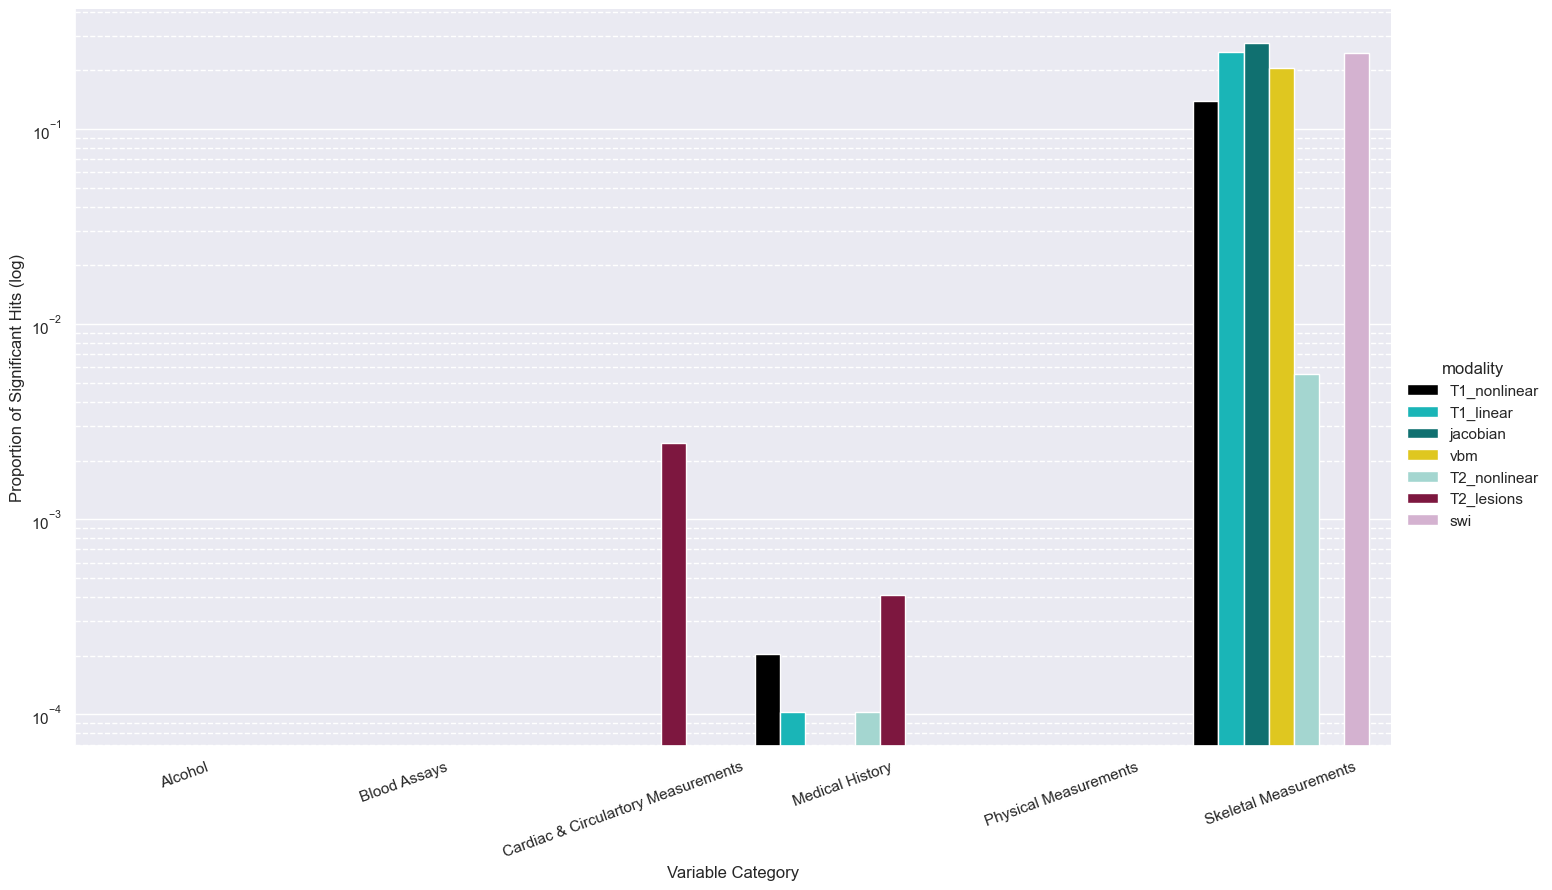

<Figure size 1600x960 with 0 Axes>

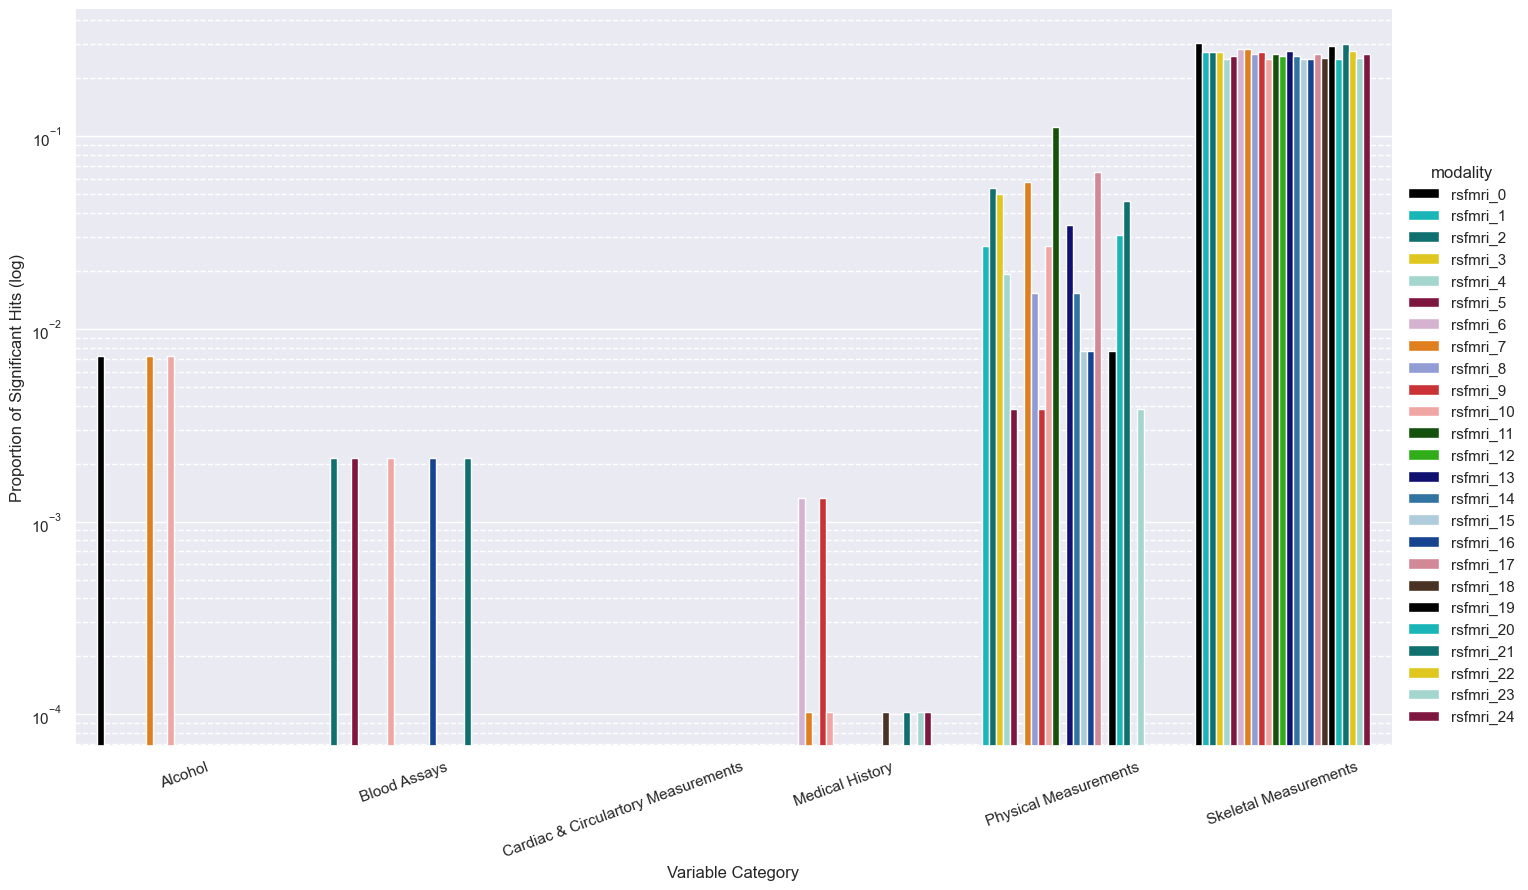

<Figure size 1600x960 with 0 Axes>

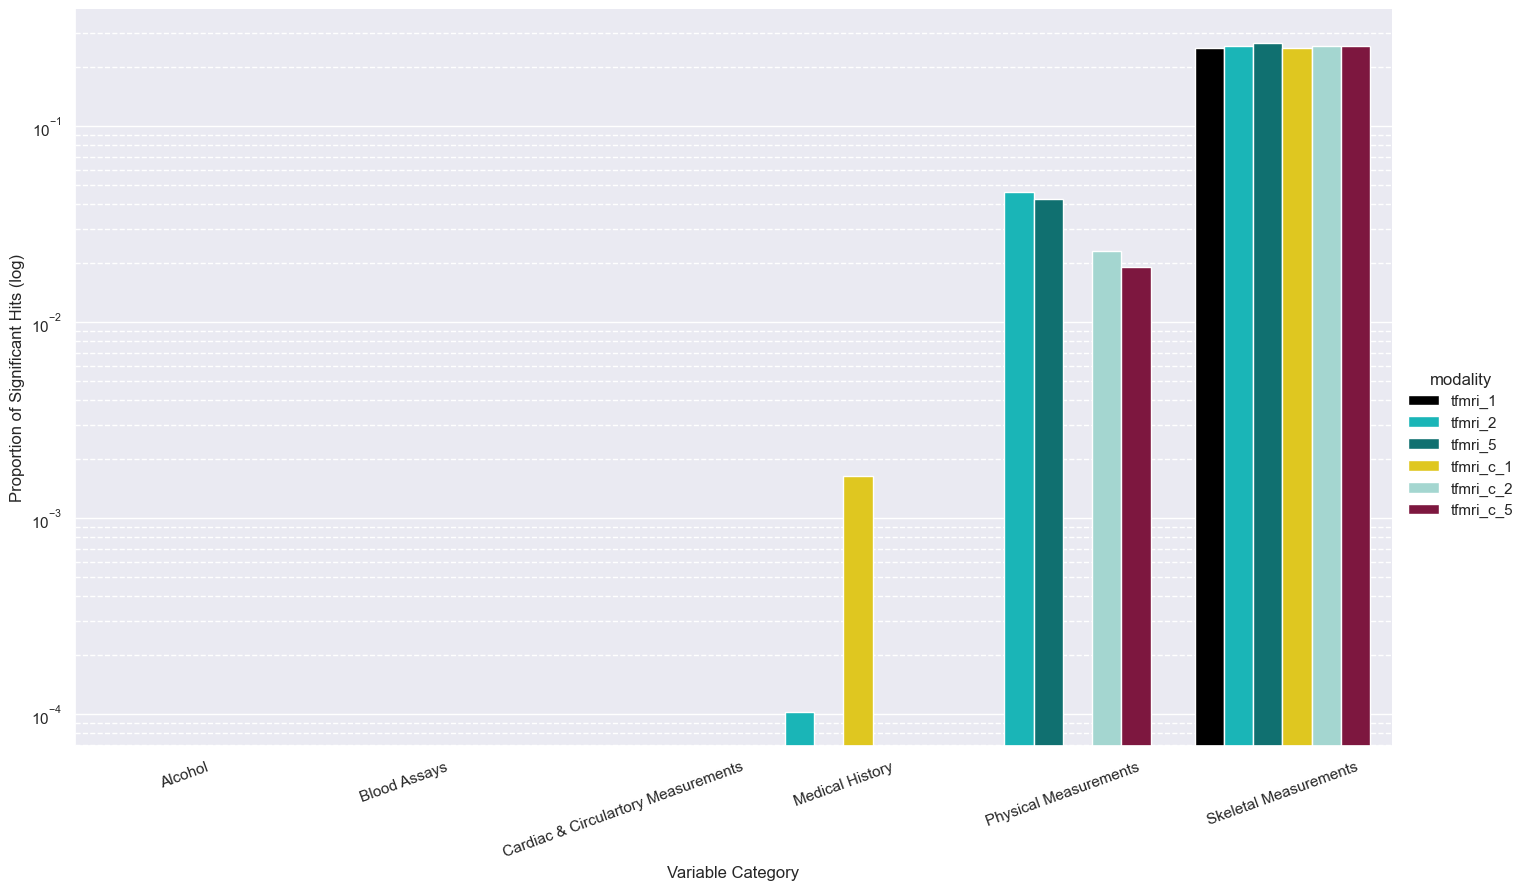

<Figure size 1600x960 with 0 Axes>

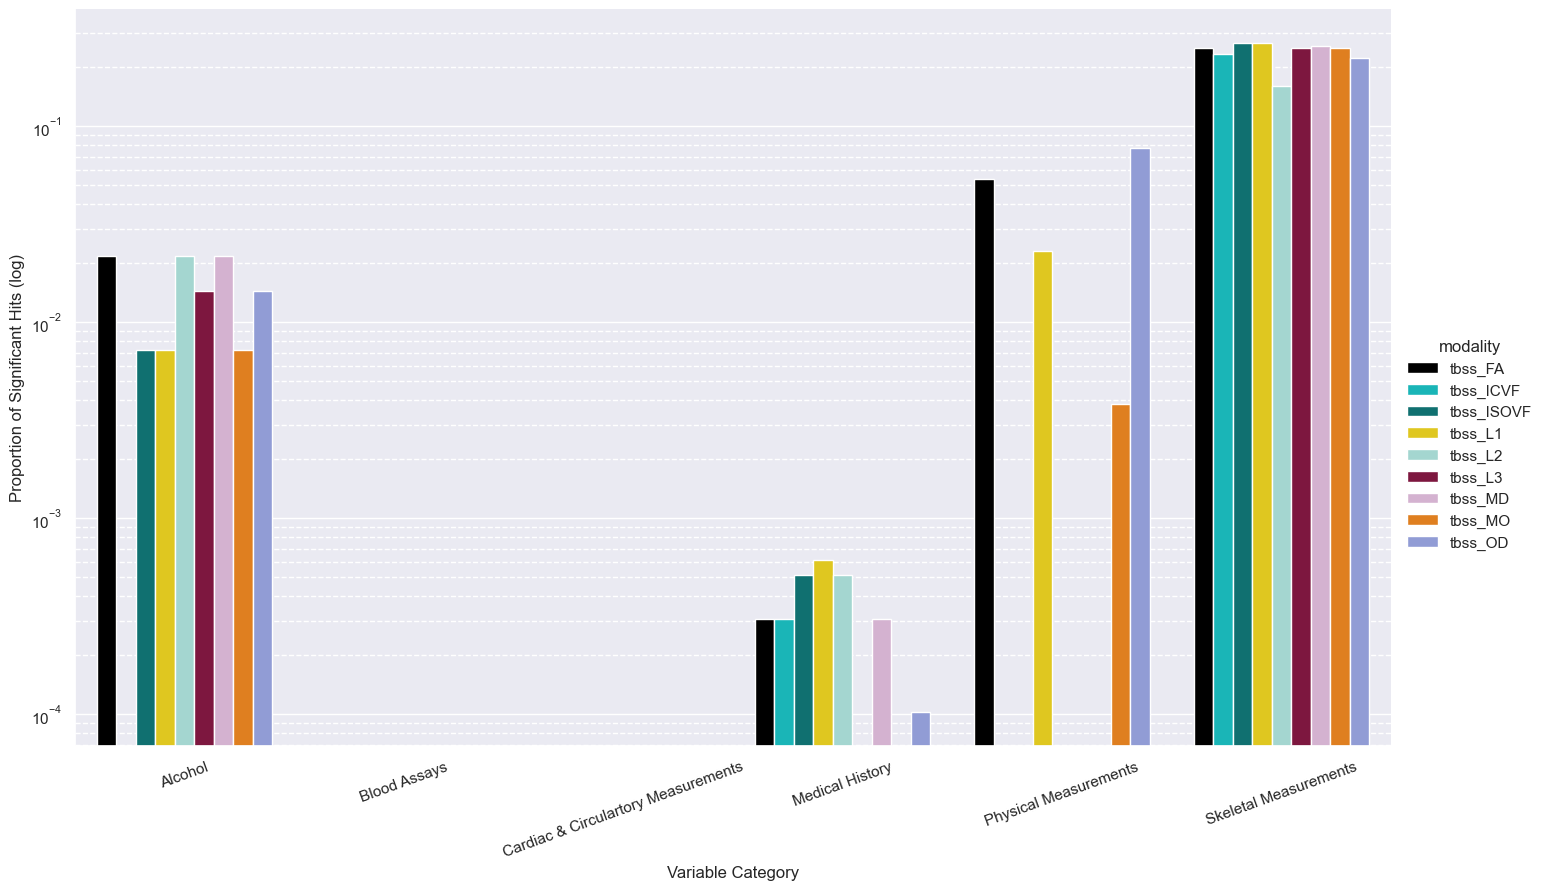

<Figure size 1600x960 with 0 Axes>

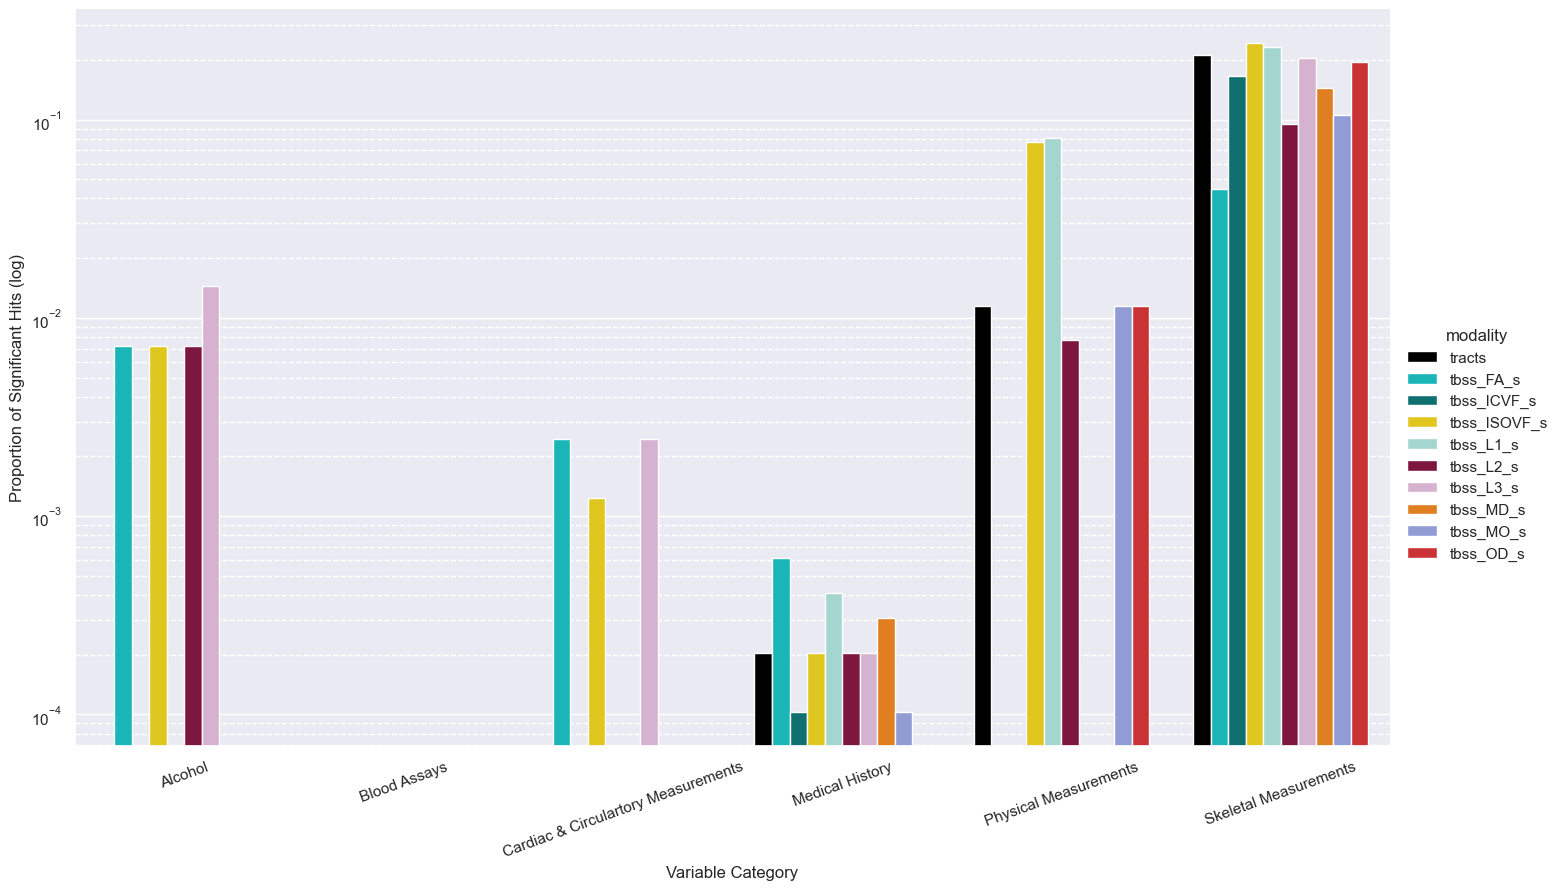

In [53]:
plt.figure(figsize=(16, 9.6))

colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'T1_nonlinear') |
                           (df_dct.modality == 'T1_linear') |
                           (df_dct.modality == 'jacobian') |
                           (df_dct.modality == 'vbm') |
                           (df_dct.modality == 'T2_nonlinear') |
                           (df_dct.modality == 'T2_lesions') |
                           (df_dct.modality == 'swi')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True,
              palette=colorCycle)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)

plt.figure(figsize=(16, 9.6))

colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'rsfmri_0') |
                           (df_dct.modality == 'rsfmri_1') |
                           (df_dct.modality == 'rsfmri_2') |
                           (df_dct.modality == 'rsfmri_3') |
                           (df_dct.modality == 'rsfmri_4') |
                           (df_dct.modality == 'rsfmri_5') |
                           (df_dct.modality == 'rsfmri_6') |
                           (df_dct.modality == 'rsfmri_7') |
                           (df_dct.modality == 'rsfmri_8') |
                           (df_dct.modality == 'rsfmri_9') |
                           (df_dct.modality == 'rsfmri_10') |
                           (df_dct.modality == 'rsfmri_11') |
                           (df_dct.modality == 'rsfmri_12') |
                           (df_dct.modality == 'rsfmri_13') |
                           (df_dct.modality == 'rsfmri_14') |
                           (df_dct.modality == 'rsfmri_15') |
                           (df_dct.modality == 'rsfmri_16') |
                           (df_dct.modality == 'rsfmri_17') |
                           (df_dct.modality == 'rsfmri_18') |
                           (df_dct.modality == 'rsfmri_19') |
                           (df_dct.modality == 'rsfmri_20') |
                           (df_dct.modality == 'rsfmri_21') |
                           (df_dct.modality == 'rsfmri_22') |
                           (df_dct.modality == 'rsfmri_23') |
                           (df_dct.modality == 'rsfmri_24') 
                           
                          ],
               kind='bar', height=8, aspect=1.75, log=True,
              palette=colorCycle)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)

plt.figure(figsize=(16, 9.6))

colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'tfmri_1') |
                           (df_dct.modality == 'tfmri_2') |
                           (df_dct.modality == 'tfmri_5') |
                           (df_dct.modality == 'tfmri_c_1') |
                           (df_dct.modality == 'tfmri_c_2') |
                           (df_dct.modality == 'tfmri_c_5') 
                           
                          ],
               kind='bar', height=8, aspect=1.75, log=True,
              palette=colorCycle)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)

plt.figure(figsize=(16, 9.6))


colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[
#                            (df_dct.modality == 'tracts') |
                           (df_dct.modality == 'tbss_FA') |
                           (df_dct.modality == 'tbss_ICVF') |
                           (df_dct.modality == 'tbss_ISOVF') |
                           (df_dct.modality == 'tbss_L1') |
                           (df_dct.modality == 'tbss_L2') |
                           (df_dct.modality == 'tbss_L3') | 
                           (df_dct.modality == 'tbss_MD') |
                           (df_dct.modality == 'tbss_MO') |
                           (df_dct.modality == 'tbss_OD') 
#                            (df_dct.modality == 'tbss_FA_s') |
#                            (df_dct.modality == 'tbss_ICVF_s') |
#                            (df_dct.modality == 'tbss_ISOVF_s') |
#                            (df_dct.modality == 'tbss_L1_s') |
#                            (df_dct.modality == 'tbss_L2_s') |
#                            (df_dct.modality == 'tbss_L3_s') | 
#                            (df_dct.modality == 'tbss_MD_s') |
#                            (df_dct.modality == 'tbss_MO_s') |
#                            (df_dct.modality == 'tbss_OD_s') 
                           
                          ],
               kind='bar', height=8, aspect=1.75, log=True,
              palette=colorCycle)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)


plt.figure(figsize=(16, 9.6))


colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'tracts') |
#                            (df_dct.modality == 'tbss_FA') |
#                            (df_dct.modality == 'tbss_ICVF') |
#                            (df_dct.modality == 'tbss_ISOVF') |
#                            (df_dct.modality == 'tbss_L1') |
#                            (df_dct.modality == 'tbss_L2') |
#                            (df_dct.modality == 'tbss_L3') | 
#                            (df_dct.modality == 'tbss_MD') |
#                            (df_dct.modality == 'tbss_MO') |
#                            (df_dct.modality == 'tbss_OD') |
                           (df_dct.modality == 'tbss_FA_s') |
                           (df_dct.modality == 'tbss_ICVF_s') |
                           (df_dct.modality == 'tbss_ISOVF_s') |
                           (df_dct.modality == 'tbss_L1_s') |
                           (df_dct.modality == 'tbss_L2_s') |
                           (df_dct.modality == 'tbss_L3_s') | 
                           (df_dct.modality == 'tbss_MD_s') |
                           (df_dct.modality == 'tbss_MO_s') |
                           (df_dct.modality == 'tbss_OD_s') 
                           
                          ],
               kind='bar', height=8, aspect=1.75, log=True,
              palette=colorCycle)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)

In [54]:
current_mods = vars_df.modality.values
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx, mod in enumerate(current_mods):
    df_dct.loc[df_dct["modality"] == mod, "modality"] = modality_names[idx]

In [55]:
df_dct

modality               var_name  var_hits
0    T1 Nonlinear                Alcohol  0.000000
1       T1 Linear                Alcohol  0.000000
2        Jacobian                Alcohol  0.000000
3             VBM                Alcohol  0.000000
4    T2 Nonlinear                Alcohol  0.000000
..            ...                    ...       ...
337            L2  Skeletal Measurements  0.161111
338            L3  Skeletal Measurements  0.250000
339            MD  Skeletal Measurements  0.255556
340            MO  Skeletal Measurements  0.250000
341            OD  Skeletal Measurements  0.222222

[342 rows x 3 columns]

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/3135202623.py:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.4])
/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/3135202623.py:89: UserWarning

<Figure size 1600x960 with 0 Axes>

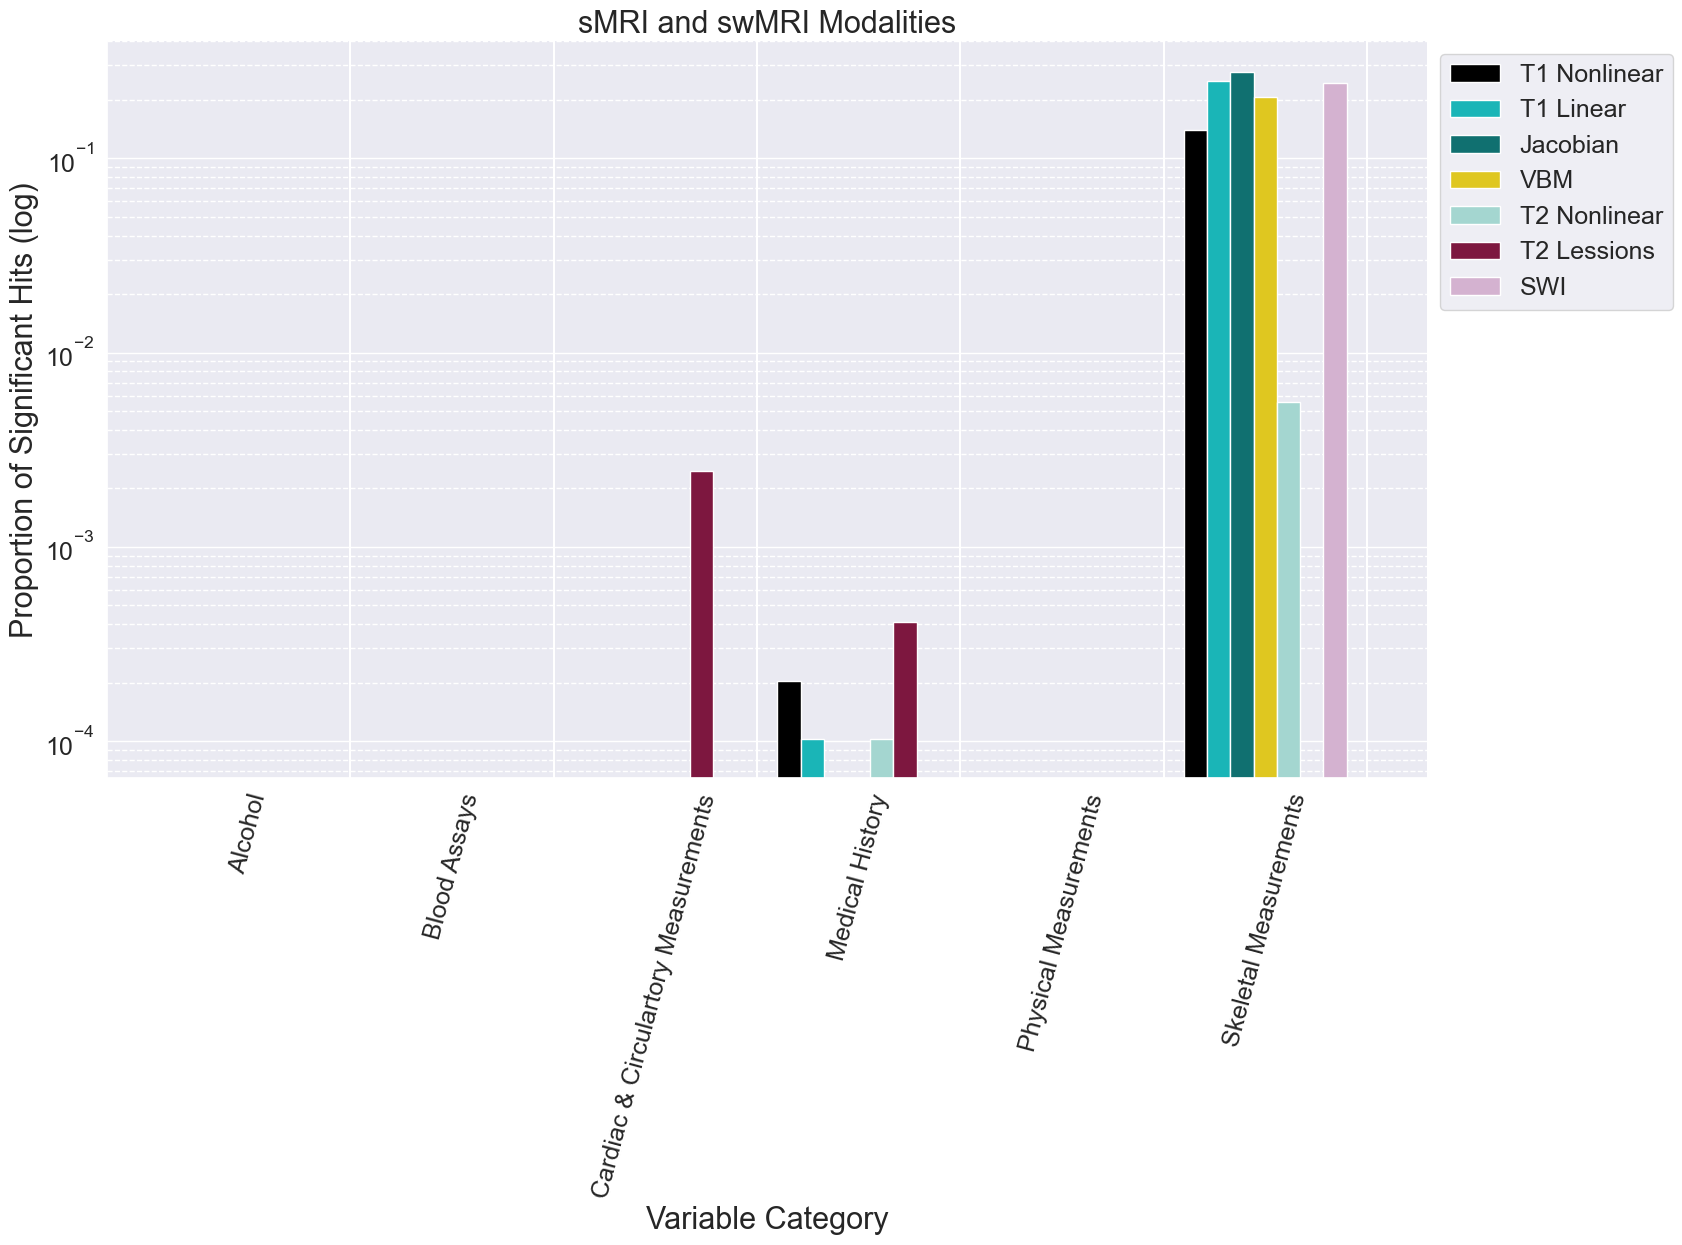

<Figure size 1600x960 with 0 Axes>

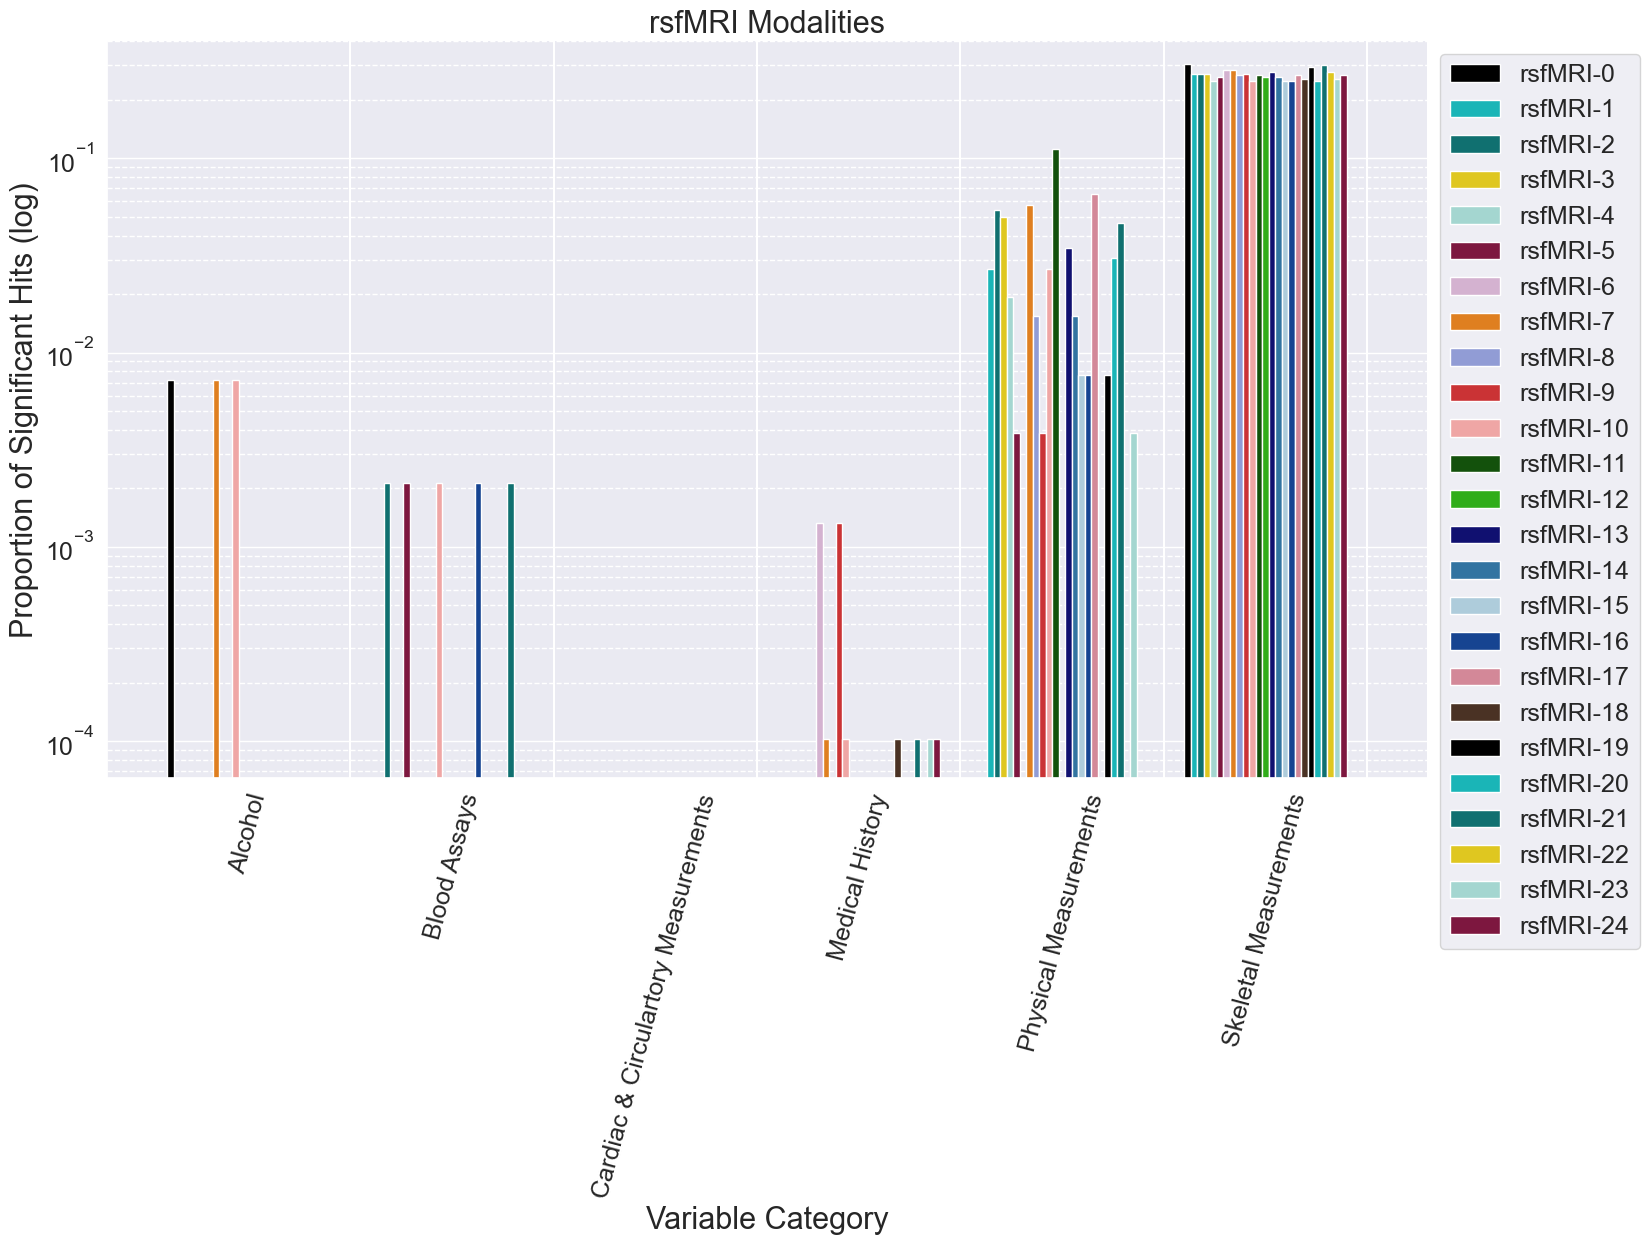

<Figure size 1600x960 with 0 Axes>

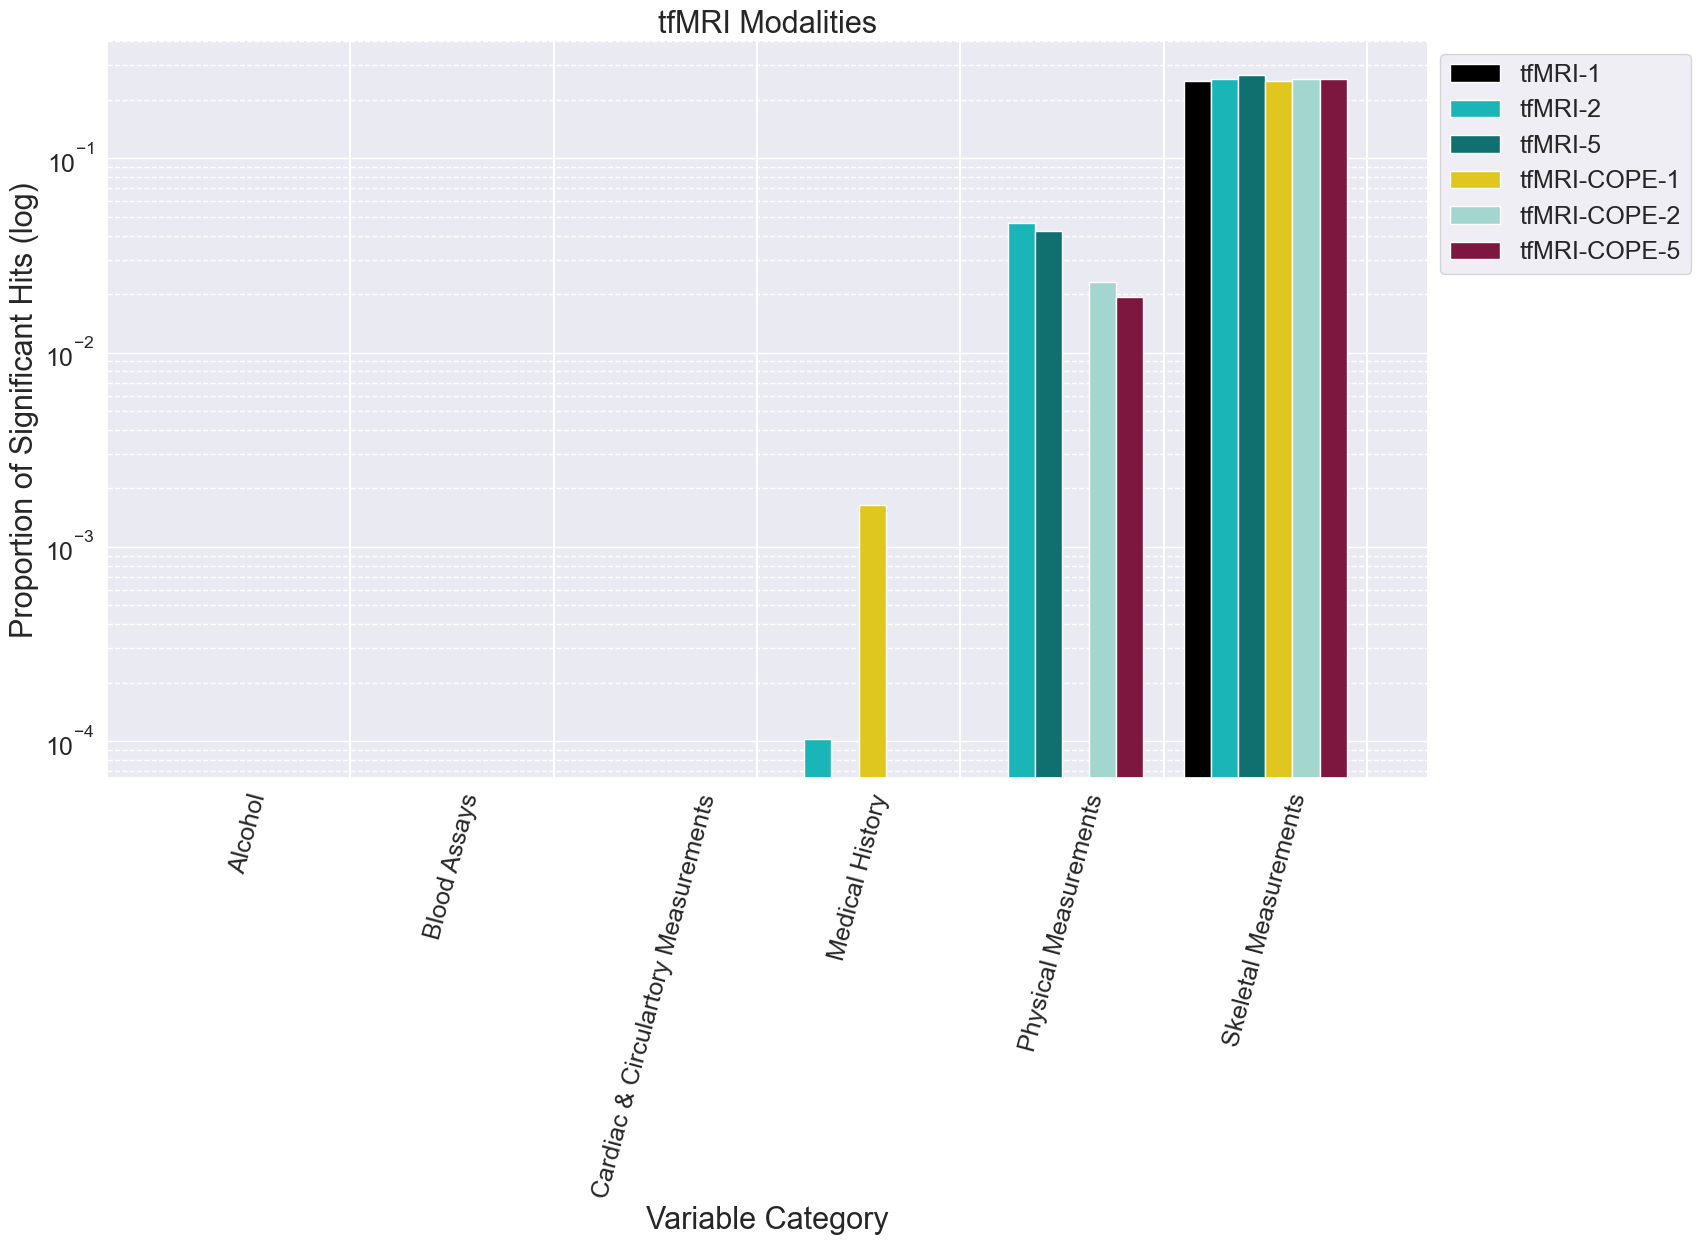

<Figure size 1600x960 with 0 Axes>

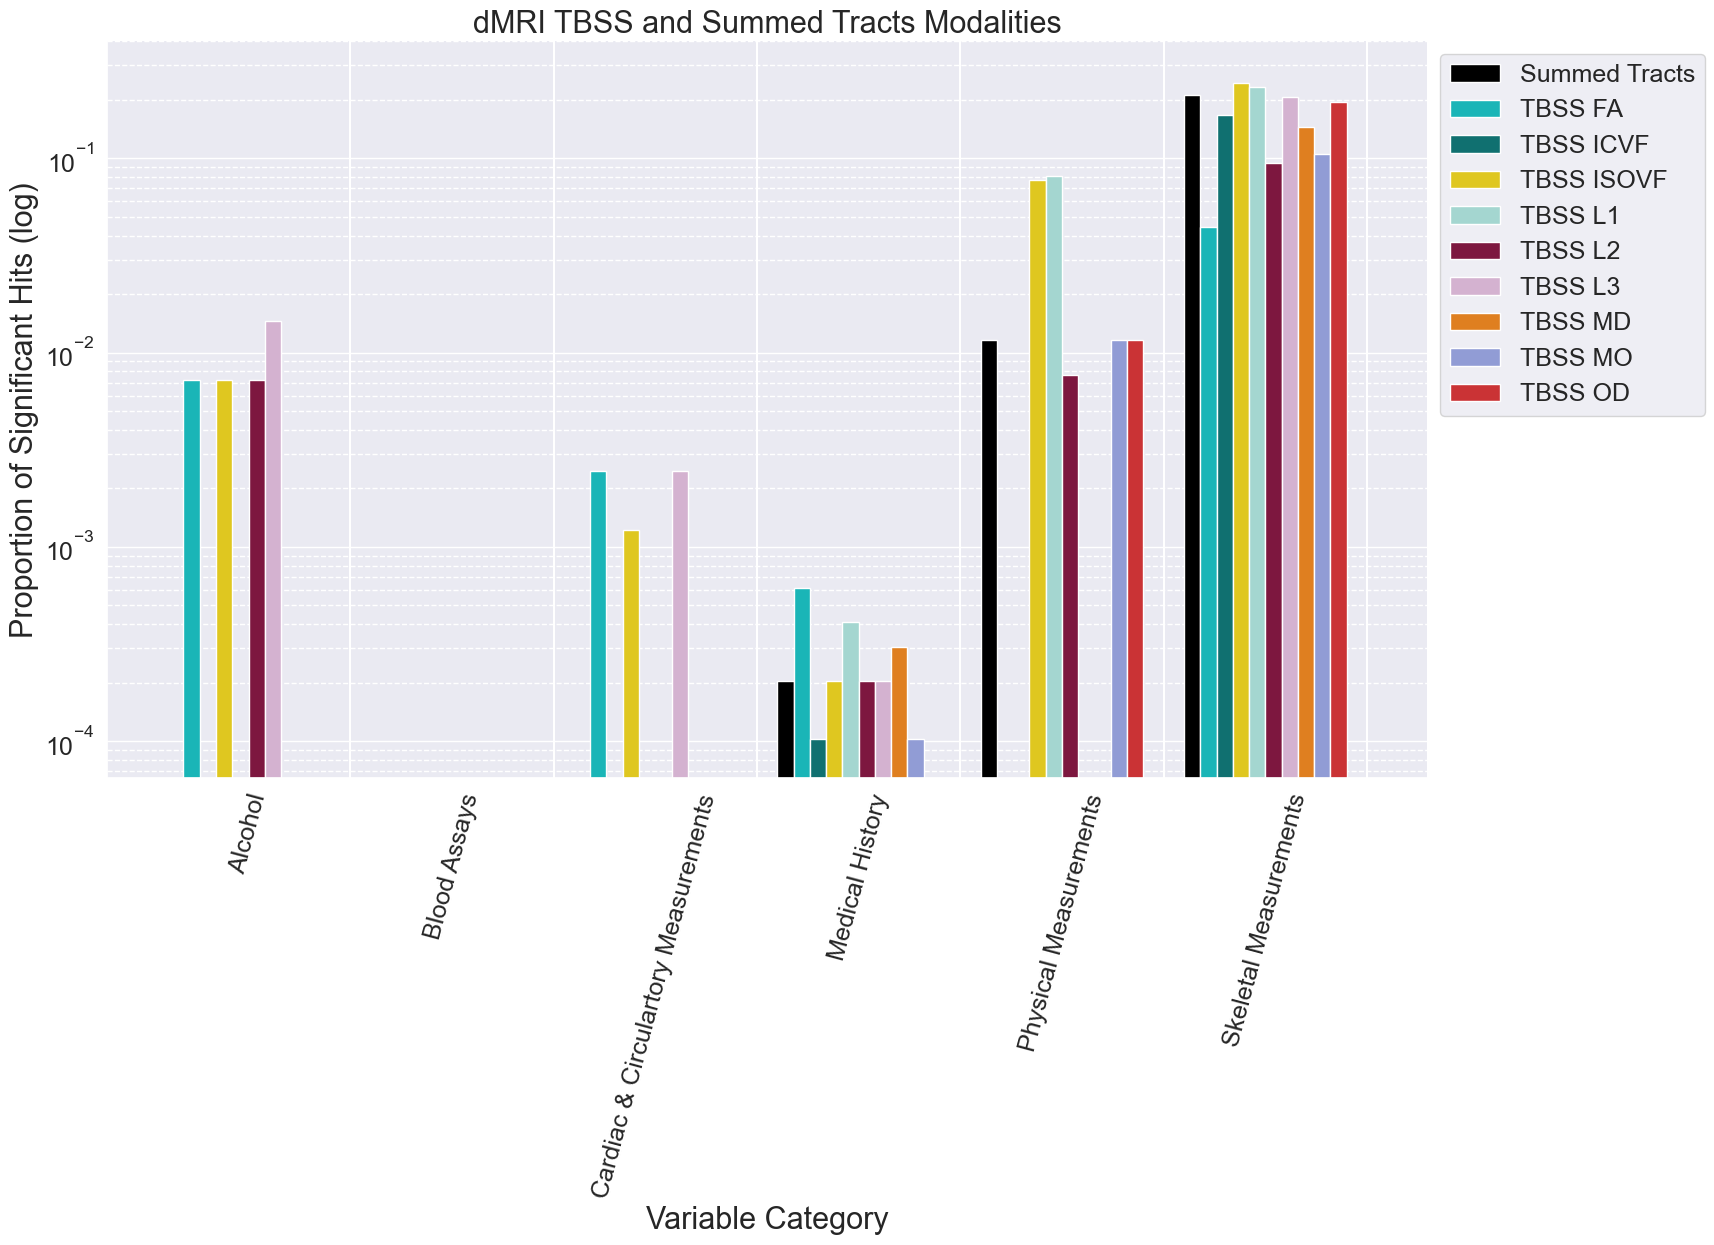

<Figure size 1600x960 with 0 Axes>

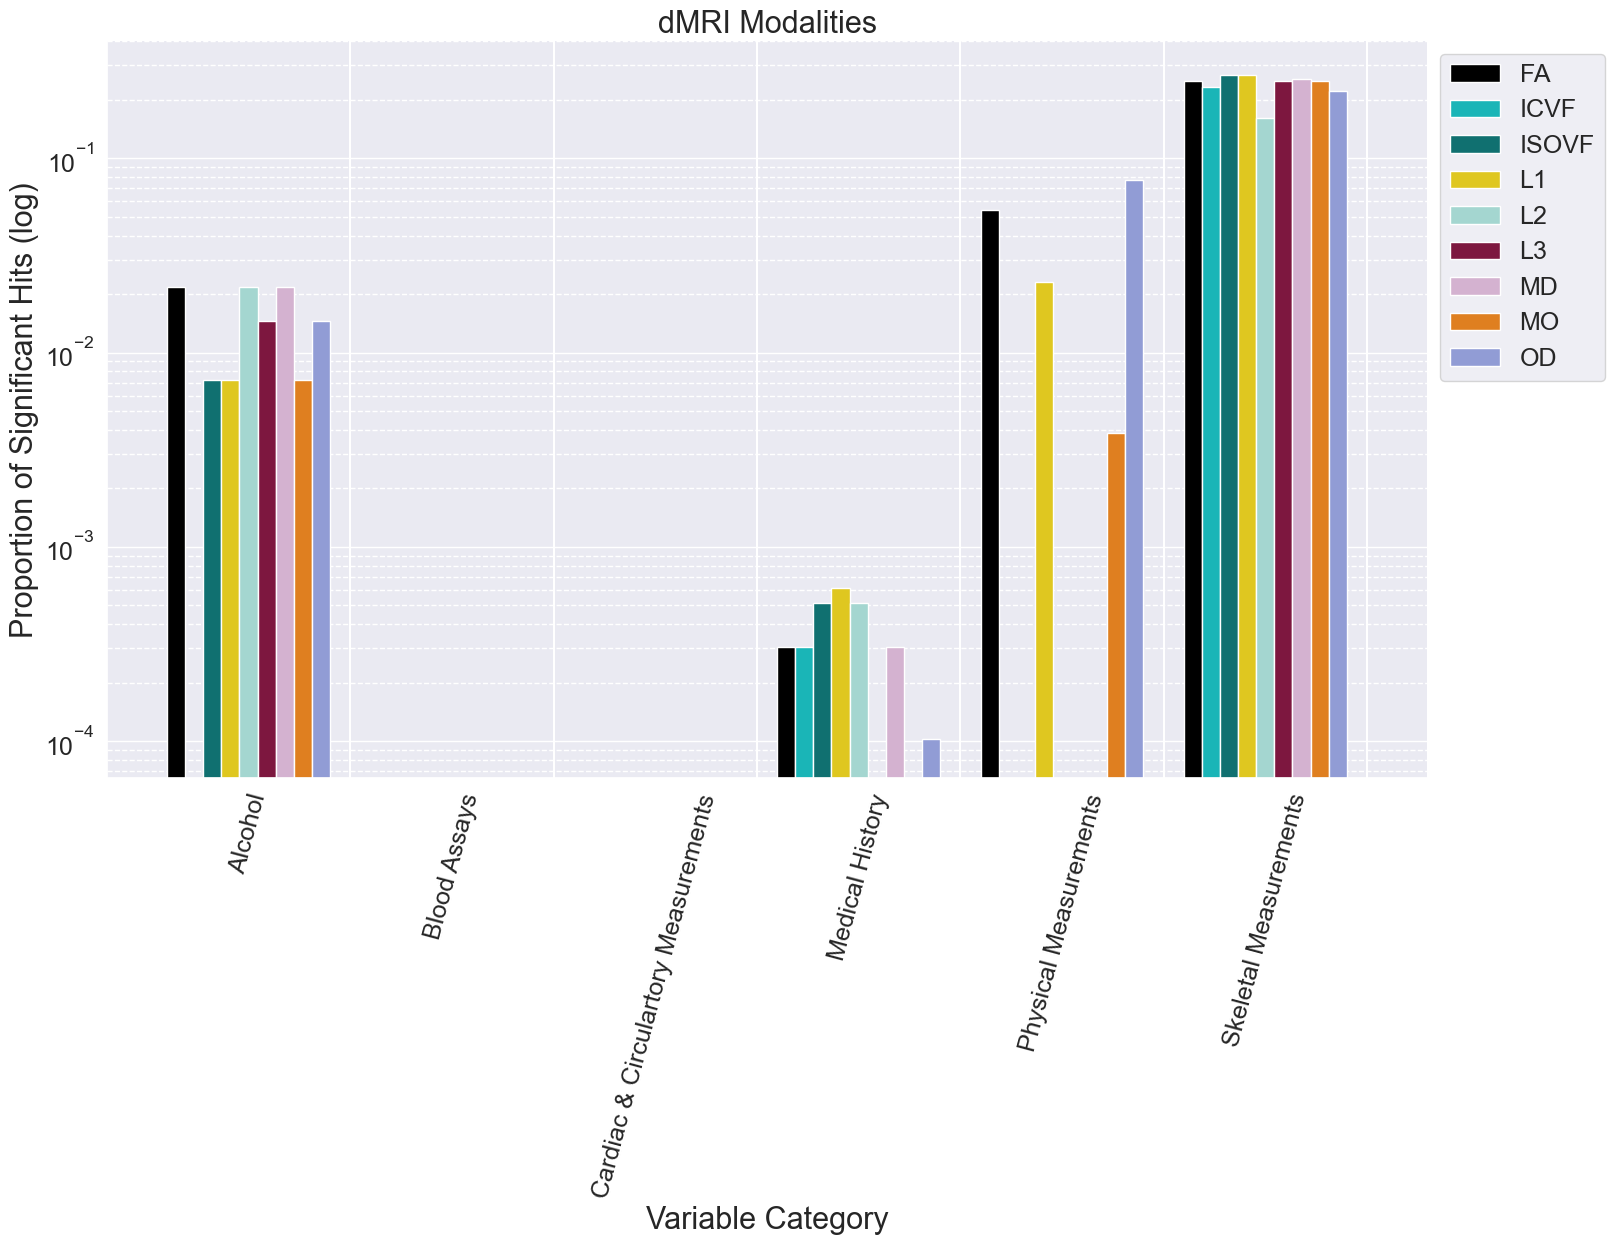

In [56]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'T1 Nonlinear') |
                           (df_dct.modality == 'T1 Linear') |
                           (df_dct.modality == 'Jacobian') |
                           (df_dct.modality == 'VBM') |
                           (df_dct.modality == 'T2 Nonlinear') |
                           (df_dct.modality == 'T2 Lessions') |
                           (df_dct.modality == 'SWI')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('sMRI and swMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_sMRI and swMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')


title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'rsfMRI-0') |
                           (df_dct.modality == 'rsfMRI-1') |
                           (df_dct.modality == 'rsfMRI-2') |
                           (df_dct.modality == 'rsfMRI-3') |
                           (df_dct.modality == 'rsfMRI-4') |
                           (df_dct.modality == 'rsfMRI-5') |
                           (df_dct.modality == 'rsfMRI-6') |
                           (df_dct.modality == 'rsfMRI-7') |
                           (df_dct.modality == 'rsfMRI-8') |
                           (df_dct.modality == 'rsfMRI-9') |
                           (df_dct.modality == 'rsfMRI-10') |
                           (df_dct.modality == 'rsfMRI-11') |
                           (df_dct.modality == 'rsfMRI-12') |
                           (df_dct.modality == 'rsfMRI-13') |
                           (df_dct.modality == 'rsfMRI-14') |
                           (df_dct.modality == 'rsfMRI-15') |
                           (df_dct.modality == 'rsfMRI-16') |
                           (df_dct.modality == 'rsfMRI-17') |
                           (df_dct.modality == 'rsfMRI-18') |
                           (df_dct.modality == 'rsfMRI-19') |
                           (df_dct.modality == 'rsfMRI-20') |
                           (df_dct.modality == 'rsfMRI-21') |
                           (df_dct.modality == 'rsfMRI-22') |
                           (df_dct.modality == 'rsfMRI-23') |
                           (df_dct.modality == 'rsfMRI-24')         
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('rsfMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_rsfMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')




title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'tfMRI-1') |
                           (df_dct.modality == 'tfMRI-2') |
                           (df_dct.modality == 'tfMRI-5') |
                           (df_dct.modality == 'tfMRI-COPE-1') |
                           (df_dct.modality == 'tfMRI-COPE-2') |
                           (df_dct.modality == 'tfMRI-COPE-5') 
                           
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('tfMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_tfMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')




title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Summed Tracts') |
                           (df_dct.modality == 'TBSS FA') |
                           (df_dct.modality == 'TBSS ICVF') |
                           (df_dct.modality == 'TBSS ISOVF') |
                           (df_dct.modality == 'TBSS L1') |
                           (df_dct.modality == 'TBSS L2') |
                           (df_dct.modality == 'TBSS L3') | 
                           (df_dct.modality == 'TBSS MD') |
                           (df_dct.modality == 'TBSS MO') |
                           (df_dct.modality == 'TBSS OD') 

                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('dMRI TBSS and Summed Tracts Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_dMRI TBSS and Summed Tracts Modalities'+'.png', bbox_inches='tight', facecolor='white')




title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[
                           (df_dct.modality == 'FA') |
                           (df_dct.modality == 'ICVF') |
                           (df_dct.modality == 'ISOVF') |
                           (df_dct.modality == 'L1') |
                           (df_dct.modality == 'L2') |
                           (df_dct.modality == 'L3') | 
                           (df_dct.modality == 'MD') |
                           (df_dct.modality == 'MO') |
                           (df_dct.modality == 'OD') 

                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('dMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_proportion_significant_hits_dMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')


In [57]:
# current_mods = vars_df.modality.values
# modality_names = [
#     'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
#     'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
#     'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
#     'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
#     'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
#     'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
# ]
# for idx, mod in enumerate(current_mods):
#     df_dct.loc[df_dct["modality"] == mod, "modality"] = modality_names[idx]
    
df_dct.loc[df_dct['var_name'] == 'Cardiac & Circulartory Measurements', 'var_name'] = 'Card. & Circ. M.'
df_dct.loc[df_dct['var_name'] == 'Physical Measurements', 'var_name'] = 'Physical M.'
df_dct.loc[df_dct['var_name'] == 'Skeletal Measurements', 'var_name'] = 'Skeletal M.'




In [58]:
set(df_dct.var_name)

{'Alcohol',
 'Blood Assays',
 'Card. & Circ. M.',
 'Medical History',
 'Physical M.',
 'Skeletal M.'}

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/2255356394.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.4])


<Figure size 1600x960 with 0 Axes>

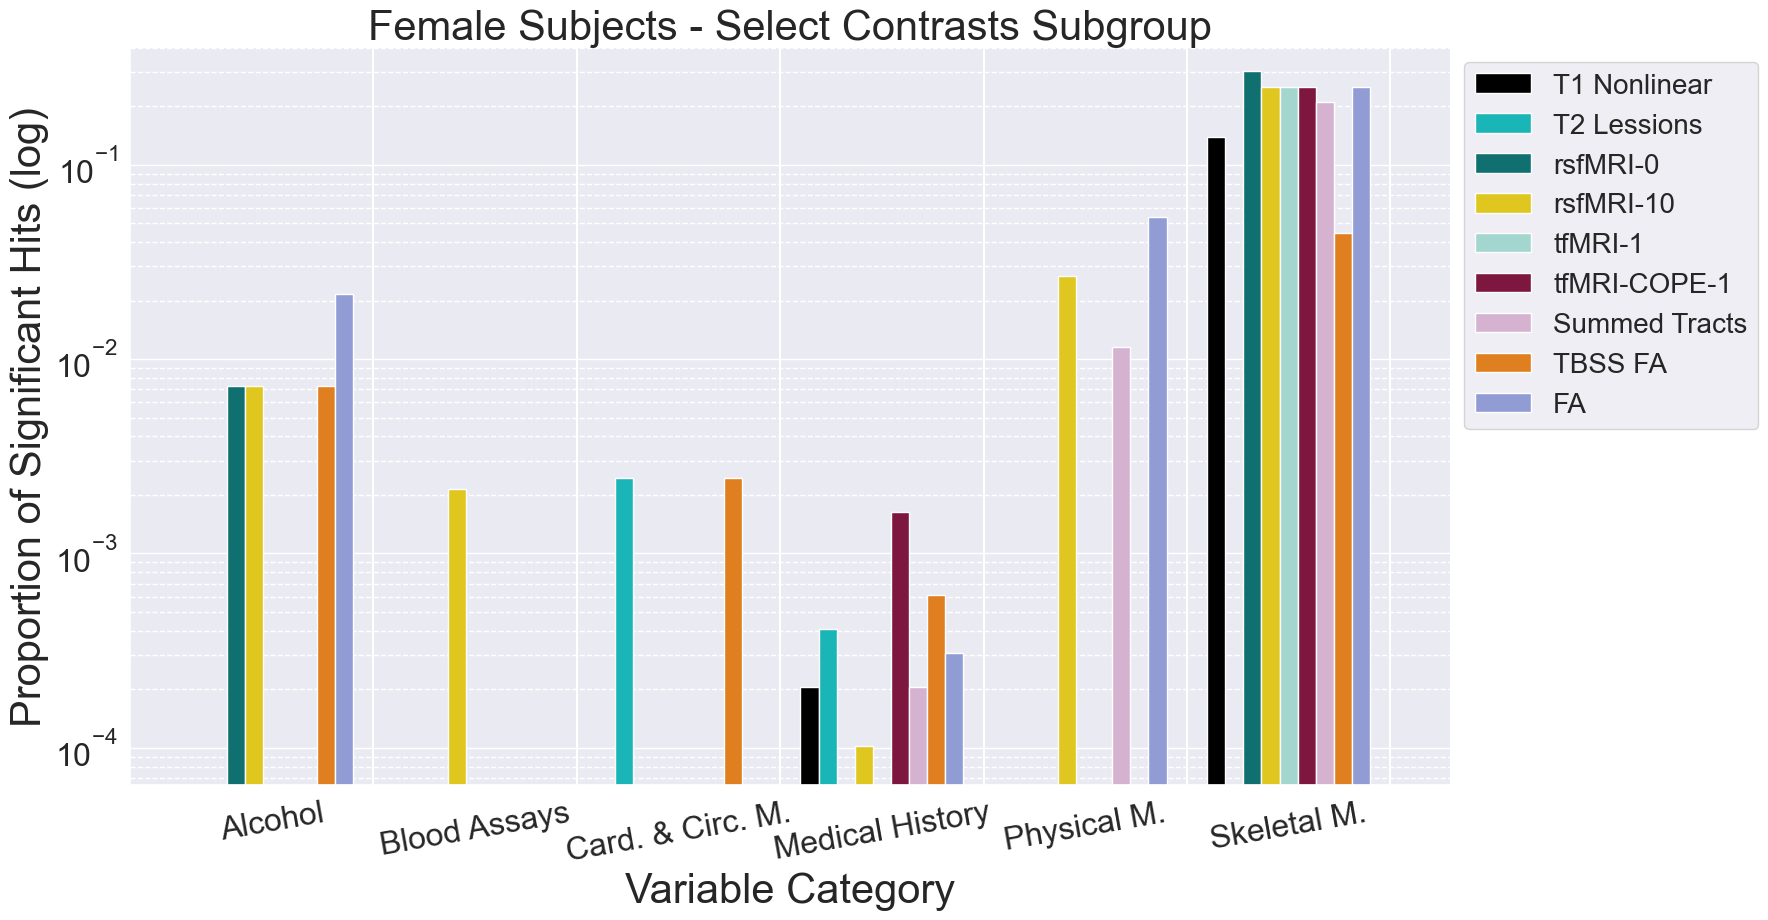

In [59]:
title_font_size=30
ticks_font_size=23
legend_font = 20
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

# T1 NonLinear, T2 Lessions, rsfmri-0, rsfmri-10, tfmri-1, tfmri1-cope, Summed Tracts, FA, TBSS FA, 

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'T1 Nonlinear') |
                           (df_dct.modality == 'T2 Lessions') |
                           (df_dct.modality == 'rsfMRI-0') |
                           (df_dct.modality == 'rsfMRI-10') |
                           (df_dct.modality == 'tfMRI-1') |
                           (df_dct.modality == 'tfMRI-COPE-1') |
                           (df_dct.modality == 'Summed Tracts') |
                           (df_dct.modality == 'FA') |
                           (df_dct.modality == 'TBSS FA')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=10, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Female Subjects - Select Contrasts Subgroup', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig('Female_proportion_significant_hits_SelectModalities.png', bbox_inches='tight', facecolor='white')


/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/3861151045.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.4])


<Figure size 1600x960 with 0 Axes>

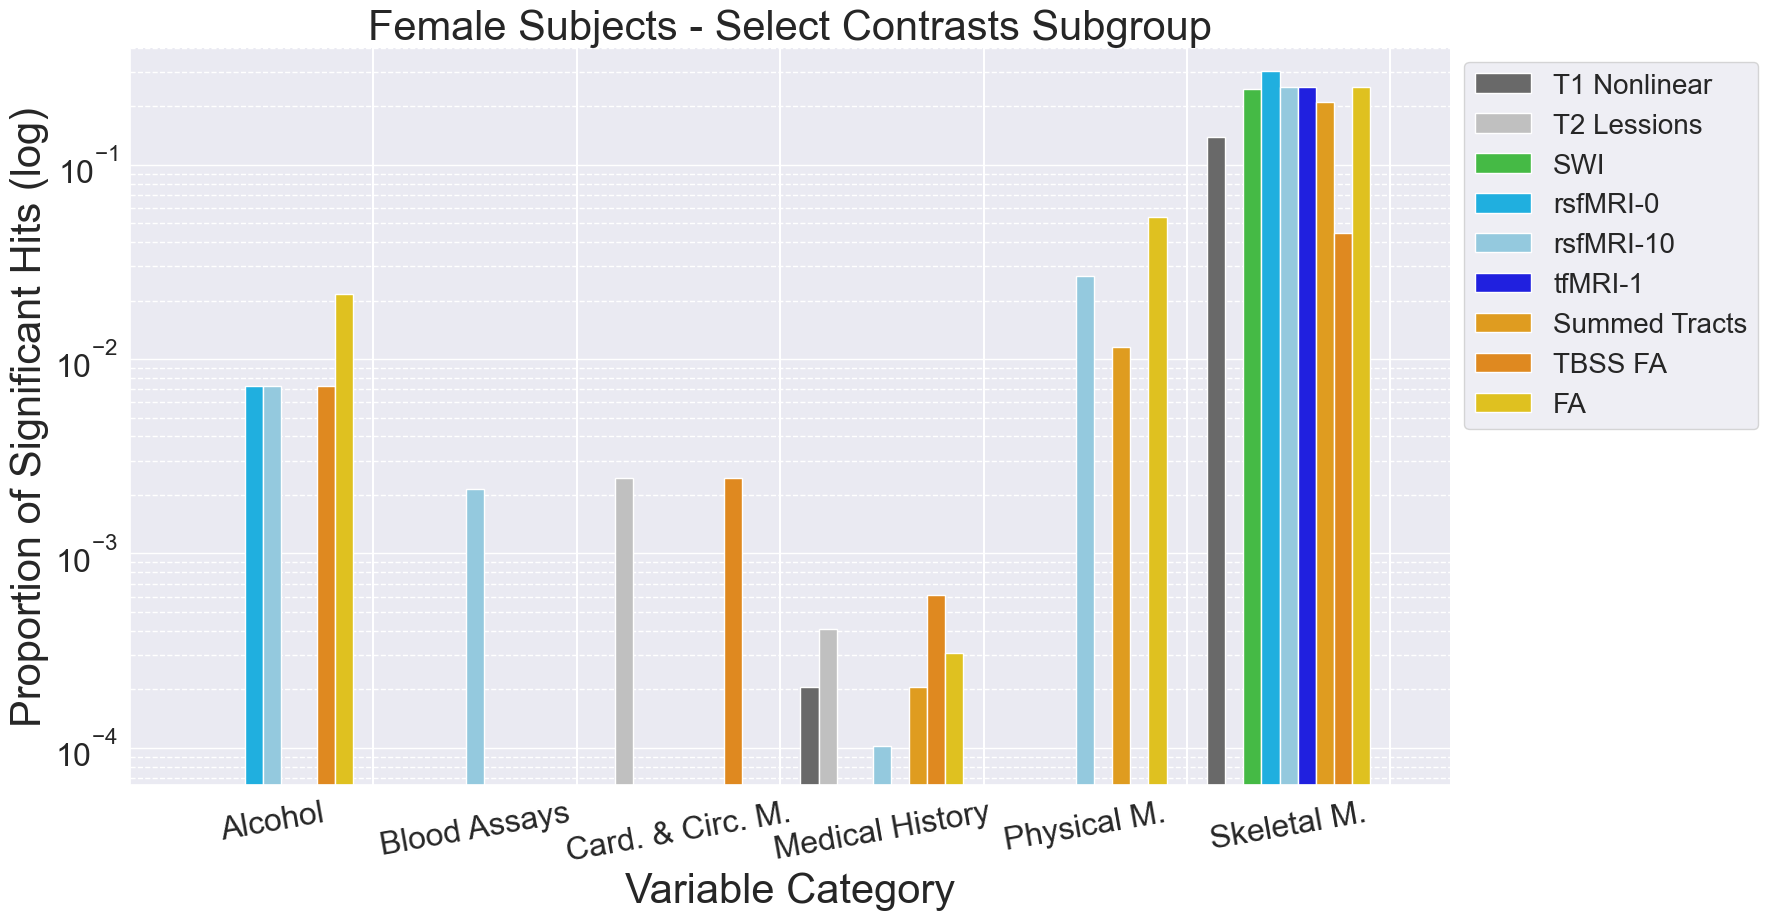

In [60]:
title_font_size=30
ticks_font_size=23
legend_font = 20
figsize=(16, 9.6)

# plt.scatter(np.arange(1, 7), MAEsNN[0:6], c='dimgray', label='sMRI')
# plt.scatter(np.arange(7, 8), MAEsNN[6:7], c='limegreen', label='swMRI')
# plt.scatter(np.arange(8, 33), MAEsNN[7:32], c='deepskyblue', label='rsfMRI')
# plt.scatter(np.arange(33, 39), MAEsNN[32:38], c='blue', label='tfMRI')
# plt.scatter(np.arange(39, 58), MAEsNN[38:], c='orange', label='dMRI')

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['dimgray', 'silver','limegreen','deepskyblue','skyblue',
            'blue','orange','darkorange','gold','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

# T1 NonLinear, T2 Lessions, rsfmri-0, rsfmri-10, tfmri-1, tfmri1-cope, Summed Tracts, FA, TBSS FA, 

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'T1 Nonlinear') |
                           (df_dct.modality == 'T2 Lessions') |
                           (df_dct.modality == 'SWI') |
                           (df_dct.modality == 'rsfMRI-0') |
                           (df_dct.modality == 'rsfMRI-10') |
                           (df_dct.modality == 'tfMRI-1') |
                           (df_dct.modality == 'Summed Tracts') |
                           (df_dct.modality == 'FA') |
                           (df_dct.modality == 'TBSS FA')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=10, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Female Subjects - Select Contrasts Subgroup', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig('Female_proportion_significant_hits_SelectModalities.png', bbox_inches='tight', facecolor='white')


/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/1066292261.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.4])


<Figure size 1600x960 with 0 Axes>

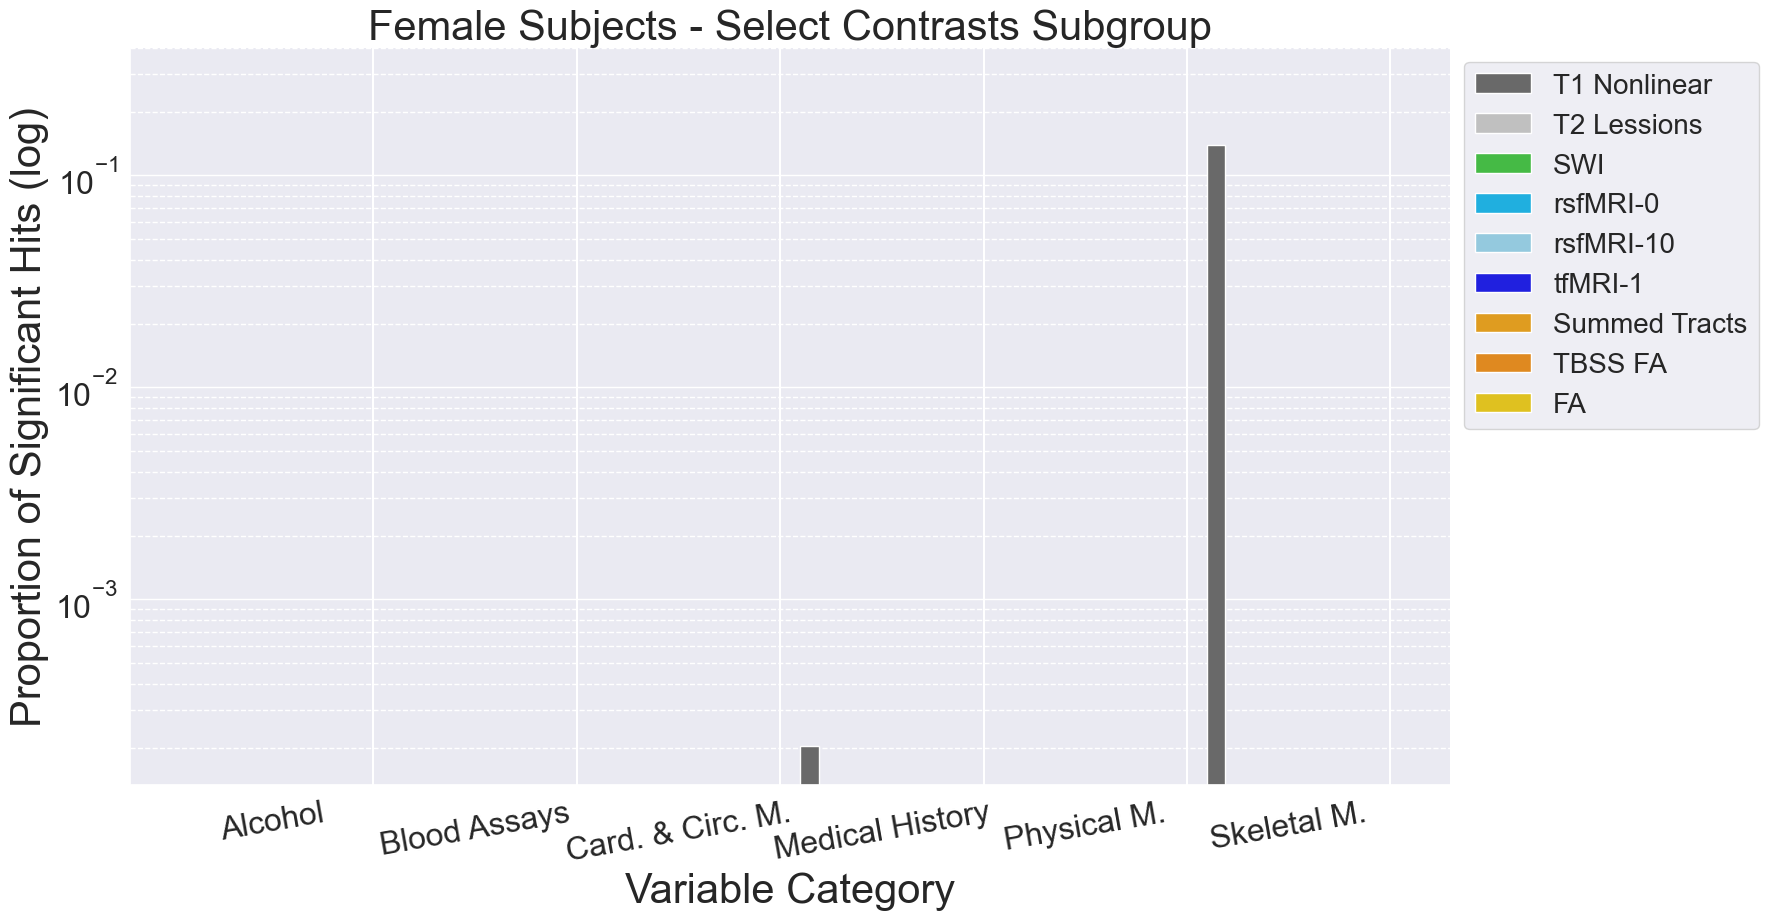

In [61]:
title_font_size=30
ticks_font_size=23
legend_font = 20
figsize=(16, 9.6)

# plt.scatter(np.arange(1, 7), MAEsNN[0:6], c='dimgray', label='sMRI')
# plt.scatter(np.arange(7, 8), MAEsNN[6:7], c='limegreen', label='swMRI')
# plt.scatter(np.arange(8, 33), MAEsNN[7:32], c='deepskyblue', label='rsfMRI')
# plt.scatter(np.arange(33, 39), MAEsNN[32:38], c='blue', label='tfMRI')
# plt.scatter(np.arange(39, 58), MAEsNN[38:], c='orange', label='dMRI')

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['dimgray', 'silver','limegreen','deepskyblue','skyblue',
            'blue','orange','darkorange','gold','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

data=df_dct[(df_dct.modality == 'T1 Nonlinear') |
                           (df_dct.modality == 'T2 Lessions') |
                           (df_dct.modality == 'SWI') |
                           (df_dct.modality == 'rsfMRI-0') |
                           (df_dct.modality == 'rsfMRI-10') |
                           (df_dct.modality == 'tfMRI-1') |
                           (df_dct.modality == 'Summed Tracts') |
                           (df_dct.modality == 'FA') |
                           (df_dct.modality == 'TBSS FA')
                          
                          ]

data.loc[data['modality'] == 'T2 Lessions', 'var_hits'] = 0
data.loc[data['modality'] == 'SWI', 'var_hits'] = 0
data.loc[data['modality'] == 'rsfMRI-0', 'var_hits'] = 0
data.loc[data['modality'] == 'rsfMRI-10', 'var_hits'] = 0
data.loc[data['modality'] == 'tfMRI-1', 'var_hits'] = 0
data.loc[data['modality'] == 'Summed Tracts', 'var_hits'] = 0
data.loc[data['modality'] == 'FA', 'var_hits'] = 0
data.loc[data['modality'] == 'TBSS FA', 'var_hits'] = 0

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=data,
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=10, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('Female Subjects - Select Contrasts Subgroup', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig('Female_proportion_significant_hits_SelectModalities.png', bbox_inches='tight', facecolor='white')


In [62]:
# data=df_dct[(df_dct.modality == 'T1 Nonlinear') |
#                            (df_dct.modality == 'T2 Lessions') |
#                            (df_dct.modality == 'SWI') |
#                            (df_dct.modality == 'rsfMRI-0') |
#                            (df_dct.modality == 'rsfMRI-10') |
#                            (df_dct.modality == 'tfMRI-1') |
#                            (df_dct.modality == 'Summed Tracts') |
#                            (df_dct.modality == 'FA') |
#                            (df_dct.modality == 'TBSS FA')
                          
#                           ]

# data.loc[data['modality'] == 'T2 Lessions', 'var_hits'] = 0
# data.loc[data['modality'] == 'SWI', 'var_hits'] = 0
# data.loc[data['modality'] == 'rsfMRI-0', 'var_hits'] = 0
# data.loc[data['modality'] == 'rsfMIR-10', 'var_hits'] = 0
# data.loc[data['modality'] == 'tfMRI-1', 'var_hits'] = 0
# data.loc[data['modality'] == 'FA', 'var_hits'] = 0
# data.loc[data['modality'] == 'TBSS FA', 'var_hits'] = 0

In [63]:
data[data.modality == 'T2 Lessions'].var_hits

5      0.0
62     0.0
119    0.0
176    0.0
233    0.0
290    0.0
Name: var_hits, dtype: float64

In [64]:
unique_vars_categories = list(set(vars_categories))
unique_vars_counters = []
for unique_category in unique_vars_categories:
    counter = 0
    for category in vars_categories:
        if unique_category == category:
            counter += 1
    unique_vars_counters.append(counter)
categories_of_interest = list(set(df_vars_over_FDR.Categories.to_list()))
categories_of_interest.sort()

counters_of_interest = []
for cat in categories_of_interest:
    idx = unique_vars_categories.index(cat)
    counters_of_interest.append(unique_vars_counters[idx])

modalities = []
counters = []


for idx in range(len(vars_df.modality)):
    
    modality = vars_df.iloc[idx].modality

    df_of_interest = vars_df.iloc[idx].dataframe
    FDR = vars_df.iloc[idx].fdr

    counter = []

    for category in categories_of_interest:
        counter.append(len(df_of_interest[(df_of_interest.Categories==category) & (df_of_interest.log_p_values>=FDR)]))
    
    modalities.append(modality)
    counters.append(counter)
    
unique_vars_categories2, unique_vars_counters2 = zip(*sorted(zip(unique_vars_categories, unique_vars_counters)))

counters = np.array(counters)
dct = {}
dct['modality'] = modalities
for idx, cat in enumerate(categories_of_interest):
    dct[cat] = counters[:, idx] / counters_of_interest[idx]
    
df_dct = pd.DataFrame.from_dict(dct)
df_dct.replace([np.inf, -np.inf], np.nan, inplace=True)

df_dct = pd.melt(df_dct, id_vars="modality", var_name="var_name", value_name="var_hits")

In [65]:
current_mods = vars_df.modality.values
modality_names = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]
for idx, mod in enumerate(current_mods):
    df_dct.loc[df_dct["modality"] == mod, "modality"] = modality_names[idx]

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Blood Assays'),
  Text(2, 0, 'Cardiac & Circulartory Measurements'),
  Text(3, 0, 'Cognitive Tests'),
  Text(4, 0, 'Diet'),
  Text(5, 0, 'Early Life Factors'),
  Text(6, 0, 'Eye Test'),
  Text(7, 0, 'Genetic Markers'),
  Text(8, 0, 'Hearing Test'),
  Text(9, 0, 'Lifestyle'),
  Text(10, 0, 'Medical History'),
  Text(11, 0, 'Mental Health'),
  Text(12, 0, 'Physical Activity'),
  Text(13, 0, 'Physical Measurements'),
  Text(14, 0, 'Physical Test'),
  Text(15, 0, 'Skeletal Measurements'),
  Text(16, 0, 'Tobacco')])

<Figure size 1600x960 with 0 Axes>

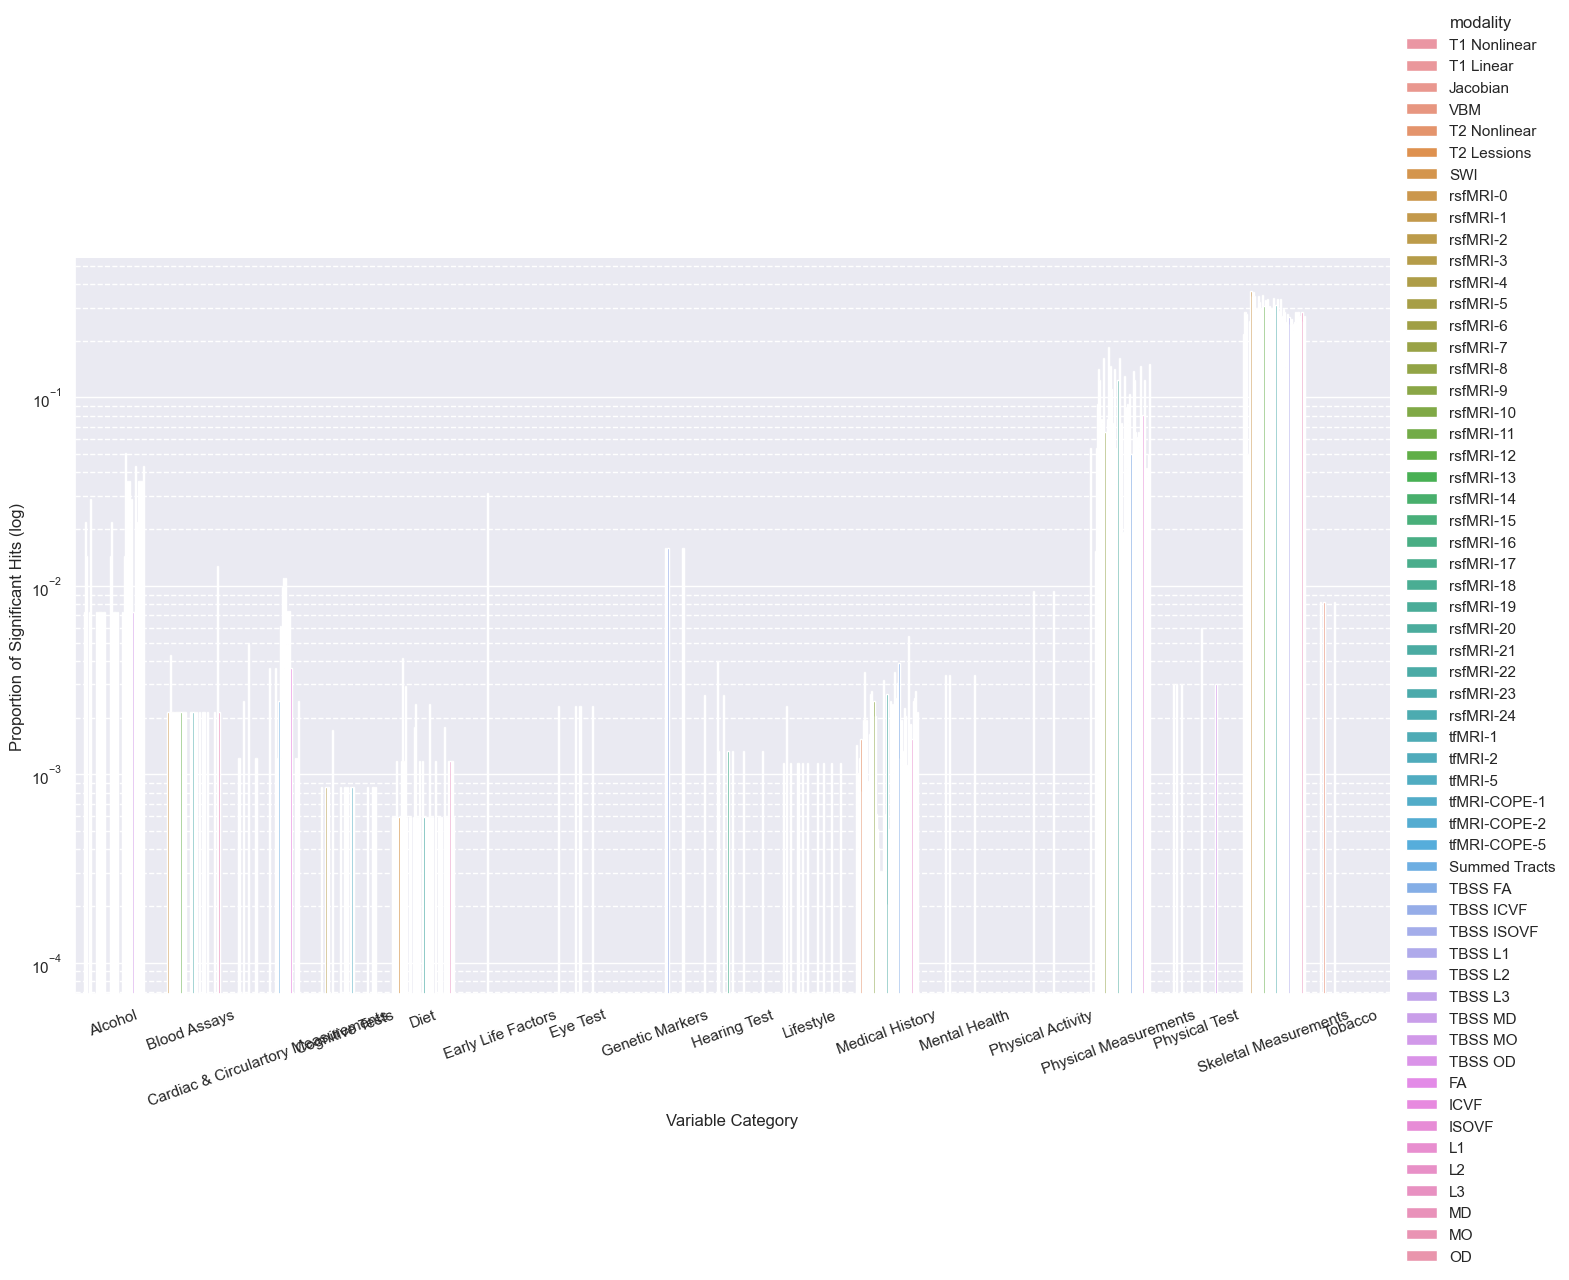

In [66]:
plt.figure(figsize=(16, 9.6))
sns.factorplot(x='var_name', y='var_hits', hue='modality', data=df_dct, kind='bar', height=8, aspect=1.75, log=True)
plt.xlabel('Variable Category')
plt.ylabel('Proportion of Significant Hits (log)')
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=20)
# plt.vlines(x=[1,2,3], ymin=0, ymax=1, color='red')

/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/2195578822.py:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.4])
/Users/aroibu_admin/SwinAgeMapper/env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/var/folders/66/_2ykm5fn1fs757m7q29p4fc40000gp/T/ipykernel_75718/2195578822.py:89: UserWarning

<Figure size 1600x960 with 0 Axes>

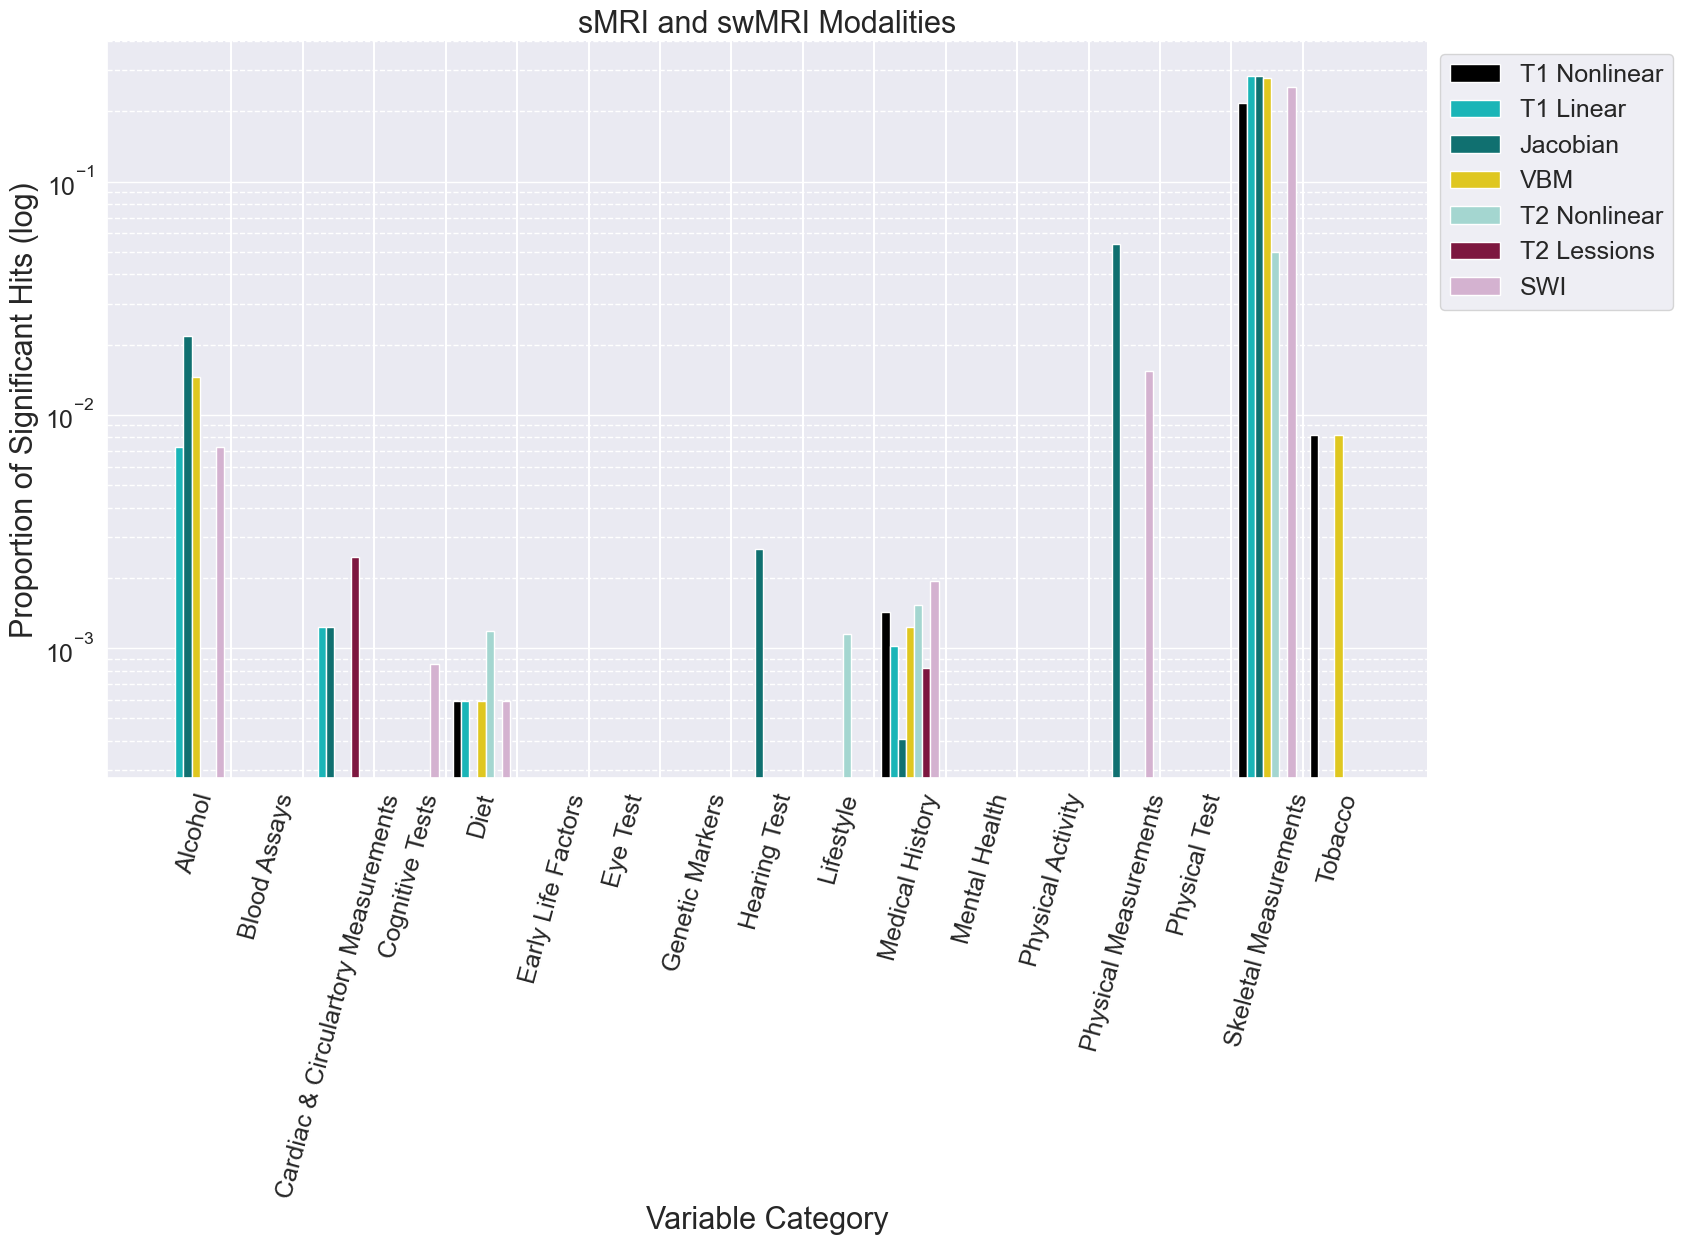

<Figure size 1600x960 with 0 Axes>

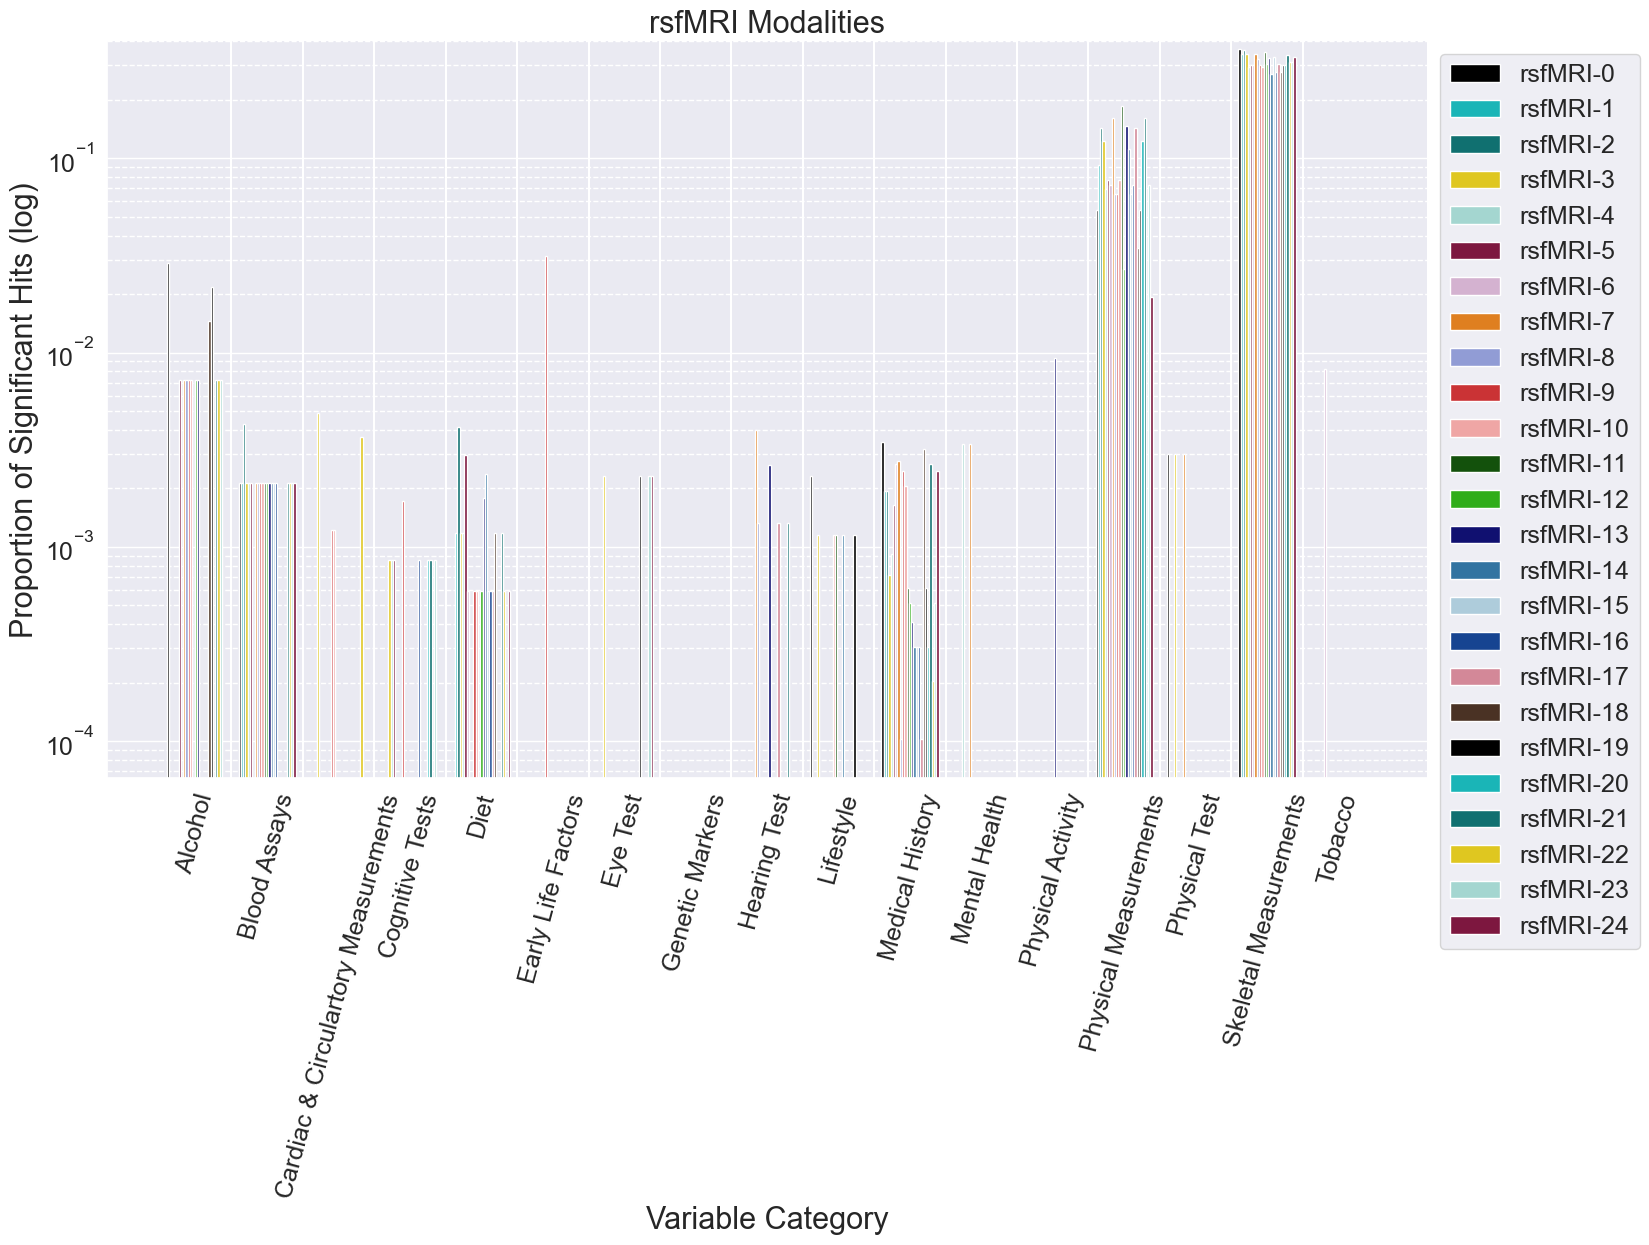

<Figure size 1600x960 with 0 Axes>

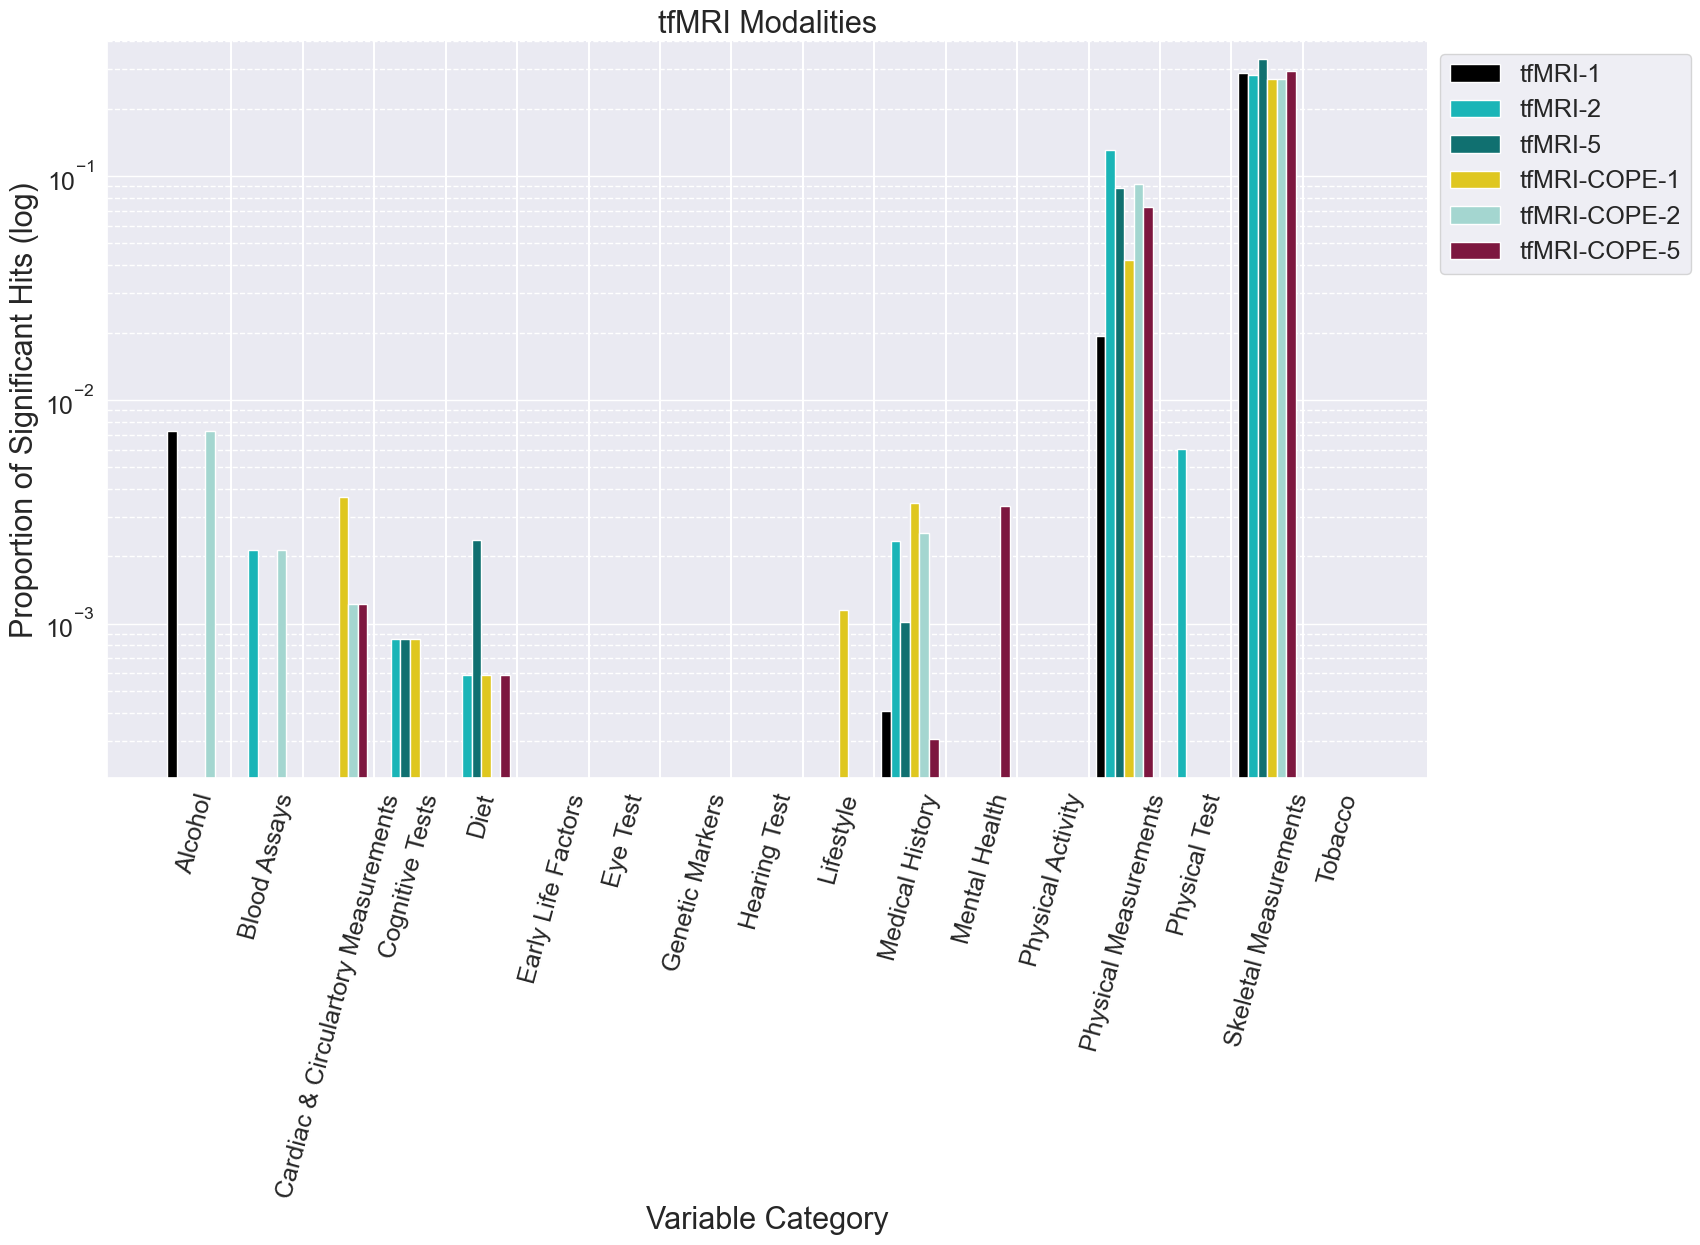

<Figure size 1600x960 with 0 Axes>

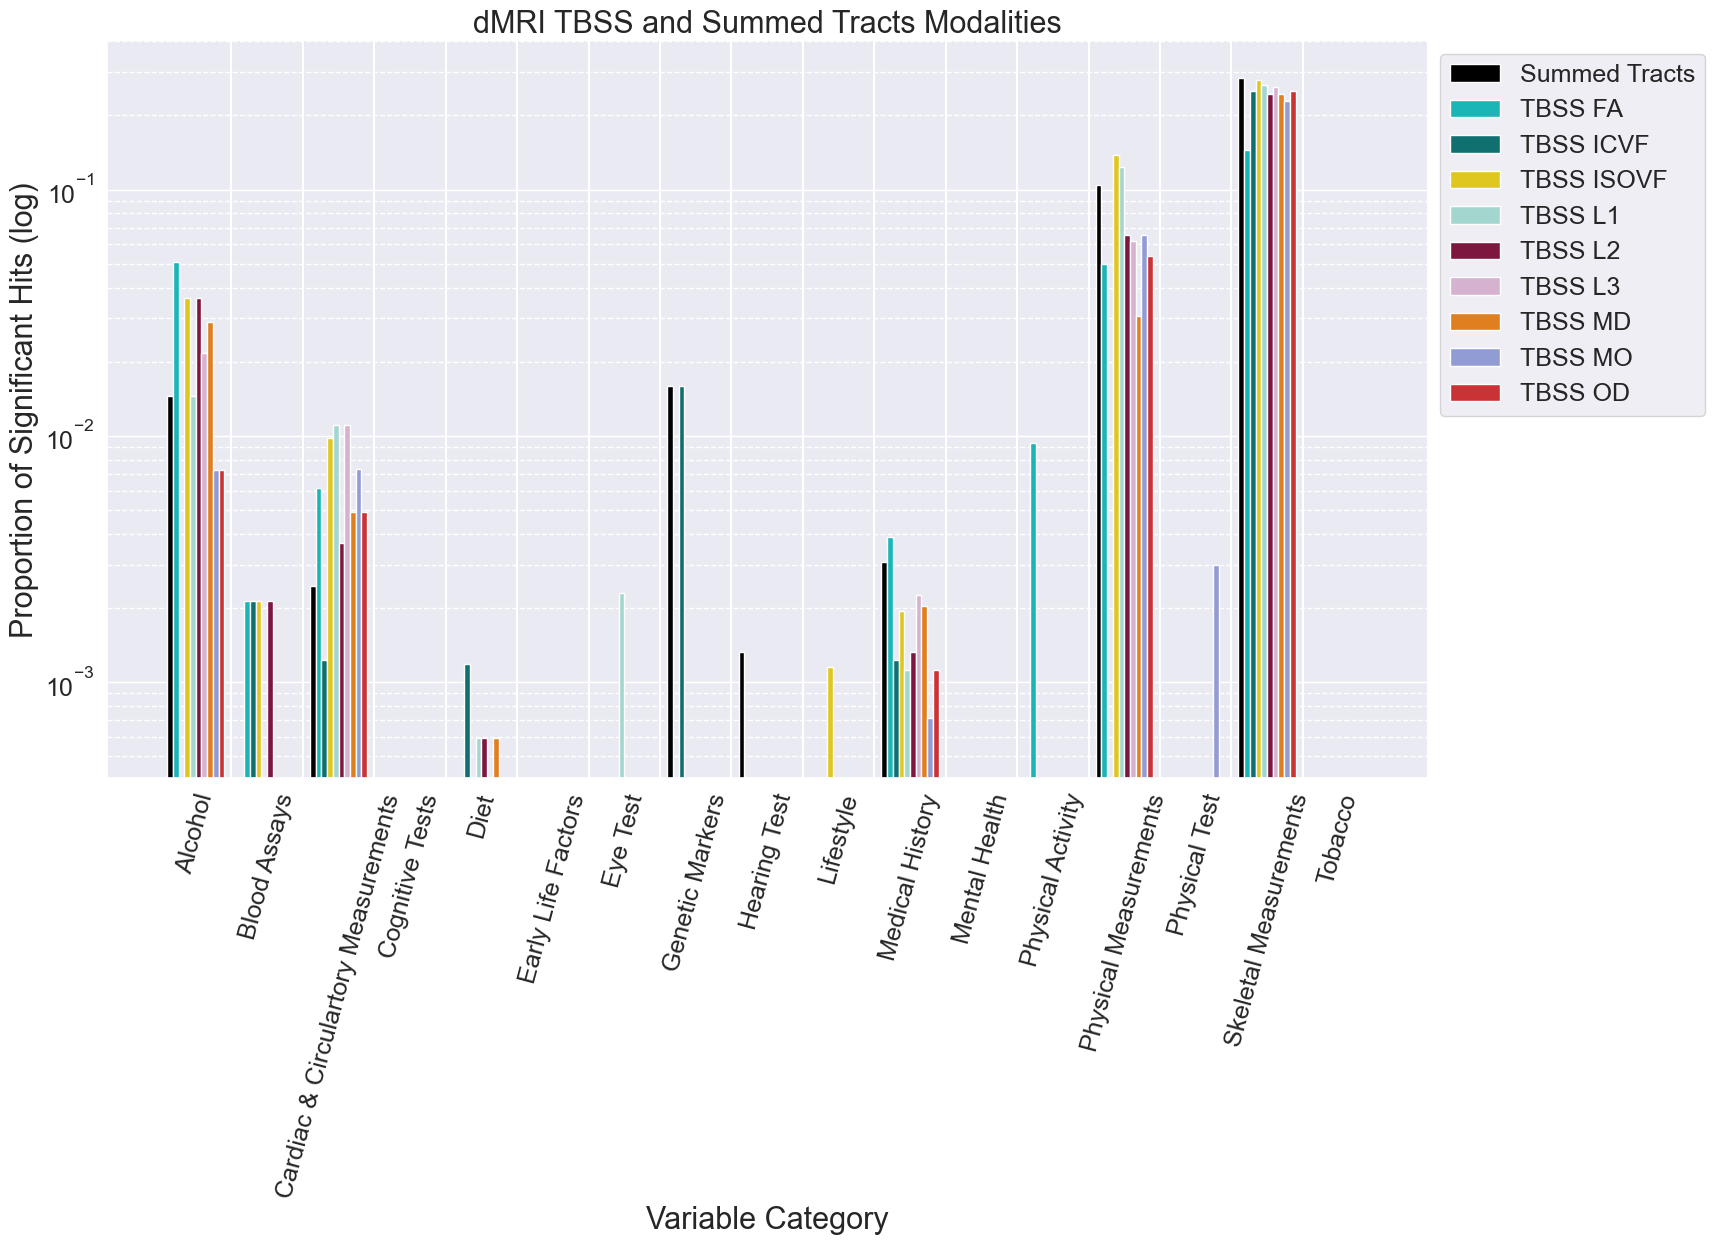

<Figure size 1600x960 with 0 Axes>

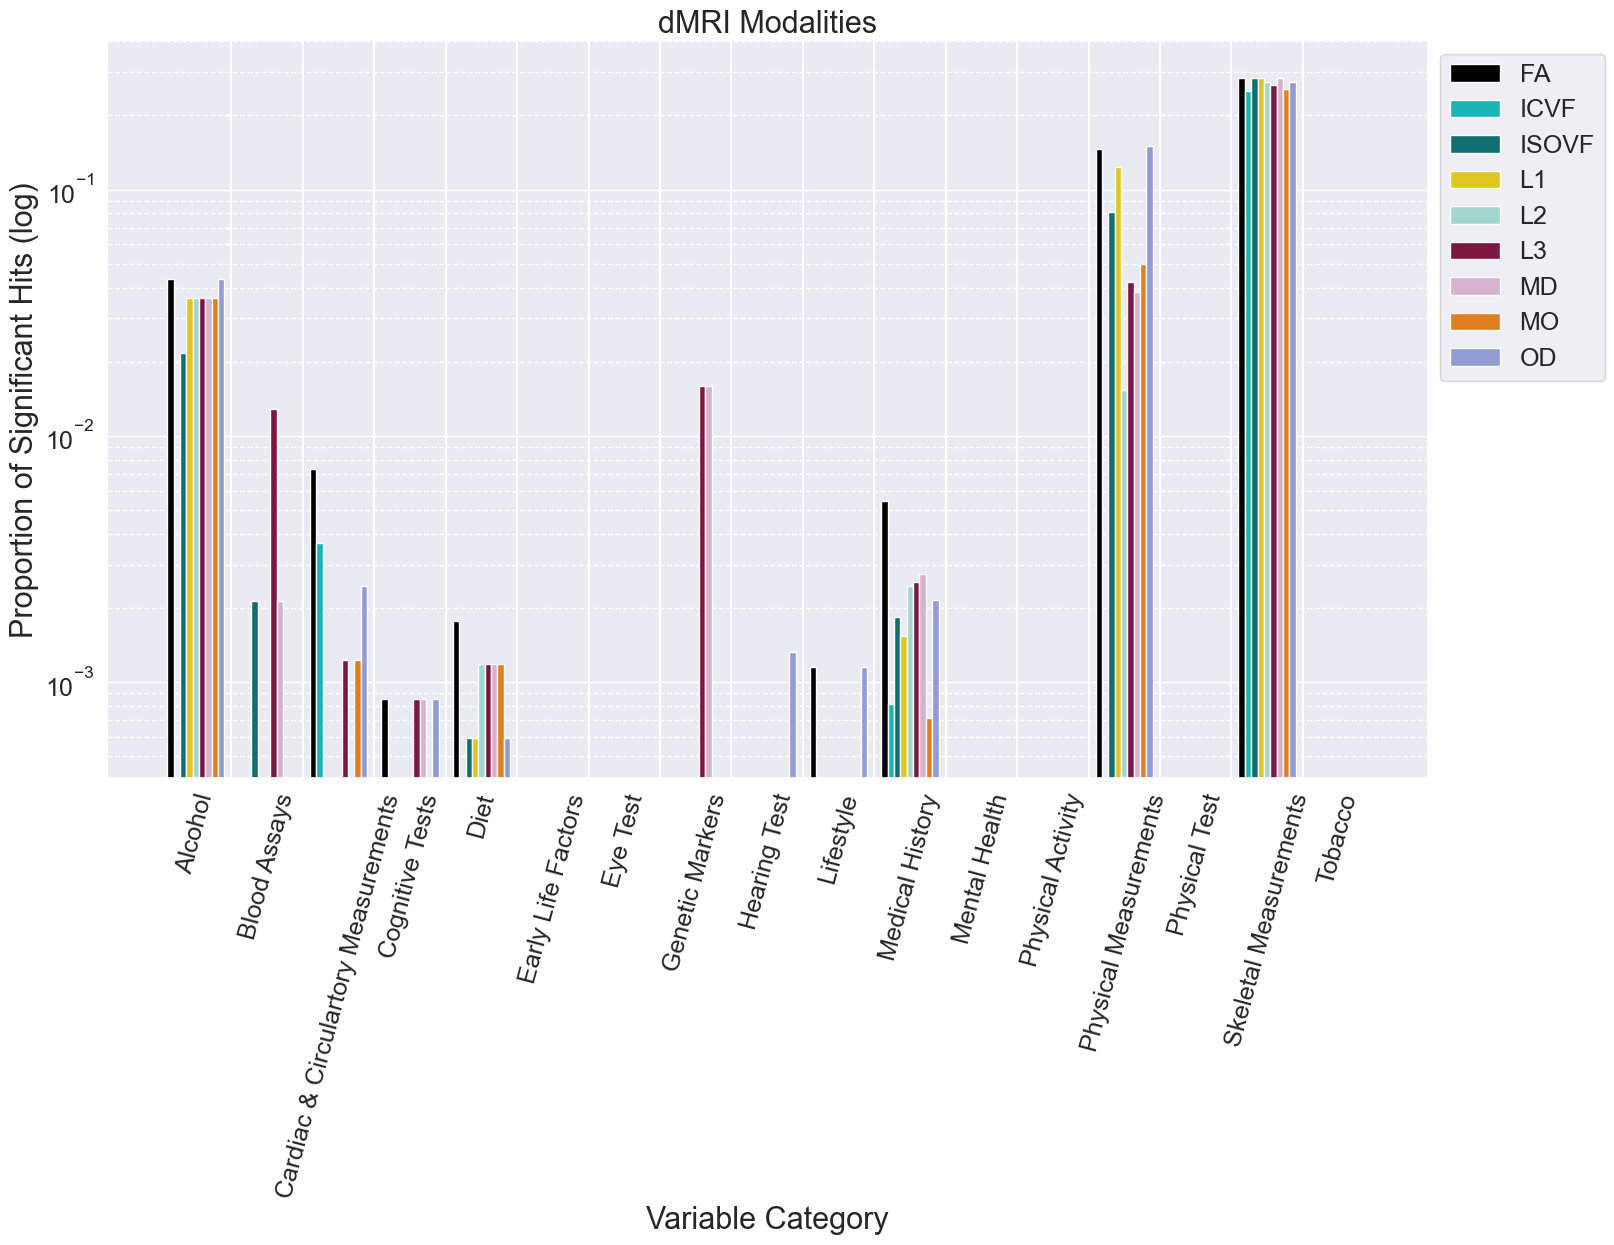

In [67]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize, facecolor='white')
# fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'T1 Nonlinear') |
                           (df_dct.modality == 'T1 Linear') |
                           (df_dct.modality == 'Jacobian') |
                           (df_dct.modality == 'VBM') |
                           (df_dct.modality == 'T2 Nonlinear') |
                           (df_dct.modality == 'T2 Lessions') |
                           (df_dct.modality == 'SWI')
                          
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('sMRI and swMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_sMRI and swMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')


title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'rsfMRI-0') |
                           (df_dct.modality == 'rsfMRI-1') |
                           (df_dct.modality == 'rsfMRI-2') |
                           (df_dct.modality == 'rsfMRI-3') |
                           (df_dct.modality == 'rsfMRI-4') |
                           (df_dct.modality == 'rsfMRI-5') |
                           (df_dct.modality == 'rsfMRI-6') |
                           (df_dct.modality == 'rsfMRI-7') |
                           (df_dct.modality == 'rsfMRI-8') |
                           (df_dct.modality == 'rsfMRI-9') |
                           (df_dct.modality == 'rsfMRI-10') |
                           (df_dct.modality == 'rsfMRI-11') |
                           (df_dct.modality == 'rsfMRI-12') |
                           (df_dct.modality == 'rsfMRI-13') |
                           (df_dct.modality == 'rsfMRI-14') |
                           (df_dct.modality == 'rsfMRI-15') |
                           (df_dct.modality == 'rsfMRI-16') |
                           (df_dct.modality == 'rsfMRI-17') |
                           (df_dct.modality == 'rsfMRI-18') |
                           (df_dct.modality == 'rsfMRI-19') |
                           (df_dct.modality == 'rsfMRI-20') |
                           (df_dct.modality == 'rsfMRI-21') |
                           (df_dct.modality == 'rsfMRI-22') |
                           (df_dct.modality == 'rsfMRI-23') |
                           (df_dct.modality == 'rsfMRI-24')         
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('rsfMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_rsfMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')




title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'tfMRI-1') |
                           (df_dct.modality == 'tfMRI-2') |
                           (df_dct.modality == 'tfMRI-5') |
                           (df_dct.modality == 'tfMRI-COPE-1') |
                           (df_dct.modality == 'tfMRI-COPE-2') |
                           (df_dct.modality == 'tfMRI-COPE-5') 
                           
                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('tfMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_tfMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')




title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[(df_dct.modality == 'Summed Tracts') |
                           (df_dct.modality == 'TBSS FA') |
                           (df_dct.modality == 'TBSS ICVF') |
                           (df_dct.modality == 'TBSS ISOVF') |
                           (df_dct.modality == 'TBSS L1') |
                           (df_dct.modality == 'TBSS L2') |
                           (df_dct.modality == 'TBSS L3') | 
                           (df_dct.modality == 'TBSS MD') |
                           (df_dct.modality == 'TBSS MO') |
                           (df_dct.modality == 'TBSS OD') 

                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('dMRI TBSS and Summed Tracts Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_dMRI TBSS and Summed Tracts Modalities'+'.png', bbox_inches='tight', facecolor='white')




title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(16, 9.6)

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('xkcd:white')
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6',
            '#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c',
            '#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4',
            '#a6cee3', '#023fa5', '#e07b91', '#50301e']

sns.factorplot(x='var_name', y='var_hits', hue='modality', 
               data=df_dct[
                           (df_dct.modality == 'FA') |
                           (df_dct.modality == 'ICVF') |
                           (df_dct.modality == 'ISOVF') |
                           (df_dct.modality == 'L1') |
                           (df_dct.modality == 'L2') |
                           (df_dct.modality == 'L3') | 
                           (df_dct.modality == 'MD') |
                           (df_dct.modality == 'MO') |
                           (df_dct.modality == 'OD') 

                          ],
               kind='bar', height=8, aspect=1.75, log=True, legend_out=False,
              palette=colorCycle)


plt.xlabel('Variable Category', fontsize=title_font_size)
plt.ylabel('Proportion of Significant Hits (log)', fontsize=title_font_size)
plt.grid( which='minor', linestyle='--')
plt.xticks(rotation=75, fontsize= ticks_font_size)
plt.yticks(fontsize= ticks_font_size)
plt.title('dMRI Modalities', fontsize=title_font_size)
plt.vlines(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5], ymin=0, ymax=1, color='white')
plt.ylim([0, 0.4])
plt.legend(fontsize=legend_font, bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Female_FDR_proportion_significant_hits_dMRI Modalities'+'.png', bbox_inches='tight', facecolor='white')